In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms
import datetime as dt
import warnings
import subprocess
import re
import unidecode
warnings.filterwarnings('ignore')
import copy
import os

# import matplotlib
# #matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     #"pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

colores = []
for name, color in mcolors.TABLEAU_COLORS.items():
    colores.append(name[4:])

In [2]:
import sys
sys.path.append('./scripts')

import utils as ut

<span style="color:red"> <h1> Actualización datos </h1> </span> 
***

In [3]:
fit_date = dt.datetime(2022, 12, 15)
projection_date = dt.datetime(2023, 6, 30)

In [8]:
import utils as ut
df_sol_UCI = ut.FRED_solicitudes_UCI()
df_sol_UCI_edad = ut.FRED_solicitudes_UCI_edad()
# df_vax = ut.FRED_vacunaciones()
df_deaths = ut.FRED_muertes()
df_deaths_edad = ut.FRED_muertes_edad()



Query is running:   0%|          | 0/1 [00:00<?, ?query/s]

Query is running: 100%|██████████| 1/1 [00:00<00:00,  4.18query/s]

Query complete after 0.24s: 100%|██████████| 1/1 [00:00<00:00,  4.13query/s]


Downloading:   0%|          | 0/1478 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 1478/1478 [00:01<00:00, 1425.18rows/s]A


Query is running:   0%|          | 0/1 [00:00<?, ?query/s]

Query is running: 100%|██████████| 1/1 [00:00<00:00,  3.02query/s]

Query complete after 0.34s: 100%|██████████| 1/1 [00:00<00:00,  2.99query/s]


Downloading:   0%|          | 0/30364 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 30364/30364 [00:01<00:00, 26243.85rows/s]A


Query is running:   0%|          | 0/1 [00:00<?, ?query/s]

Query executing stage S00: Input and status COMPLETE : 0.00s:   0%|          | 0/6 [00:00<?, ?query/s]

Query executing stage S00: Input and status COMPLETE : 0.00s: 100%|██████████| 6/6 [00:00<00:00, 26.14query/s]

Query complete after 0.23s: 100%|██████████| 6

In [9]:
df_sol_UCI.to_csv('../data/BOG_UCI_timeseries.csv')
df_sol_UCI_edad.to_csv('../data/FRED_UCI_edad.csv')
df_deaths.to_csv('../data/COL_covid_death_data.csv')
df_deaths_edad.to_csv('../data/Age_BOG_covid_data.csv')
# df_vax.to_csv('../data/updated_vaccine_capacity_timeseries.csv')

In [10]:
if os.path.exists('../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv'):
    os.remove('../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv')
    
file_url = '"https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Numero-de-Reproduccion-Efectivo-R(t)%20todos%20los%20casos.csv"'
subprocess.run("wget "+file_url+" -P ../data/", shell=True, check=True)

--2023-03-09 19:23:21--  https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Numero-de-Reproduccion-Efectivo-R(t)%20todos%20los%20casos.csv
Resolving saludata.saludcapital.gov.co (saludata.saludcapital.gov.co)... 190.24.161.8, 2801:149:0:104::45
Connecting to saludata.saludcapital.gov.co (saludata.saludcapital.gov.co)|190.24.161.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3274566 (3.1M) [text/csv]
Saving to: ‘../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv’

     0K .......... .......... .......... .......... ..........  1%  357K 9s
    50K .......... .......... .......... .......... ..........  3%  715K 7s
   100K .......... .......... .......... .......... ..........  4%  713K 6s
   150K .......... .......... .......... .......... ..........  6%  715K 5s
   200K .......... .......... .......... .......... ..........  7%  165M 4s
   250K .......... .......... .......... .......... ..........  9%  709K 4s
   300K .........

CompletedProcess(args='wget "https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Numero-de-Reproduccion-Efectivo-R(t)%20todos%20los%20casos.csv" -P ../data/', returncode=0)

In [14]:
path = '../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv'
with open(path, encoding='latin1') as f:
    contents = f.readlines()

column_names = unidecode.unidecode(contents[0].upper())
for r in ((' ;', ';'), (' ;', ';'),(' ','_')):
    column_names = column_names.replace(*r)

## Limpieza de tabla
os.remove('../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv')

file = open('../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv', 'a')
for i in range(5, len(contents)):
    file.writelines(unidecode.unidecode(contents[i].replace(',','.')))
file.close()

In [15]:
if os.path.exists('../data/Ocupacion-Hospitalizacion-COVID-19.csv'):
    os.remove('../data/Ocupacion-Hospitalizacion-COVID-19.csv')
    
file_url = '"https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Ocupacion-Hospitalizacion-COVID-19.csv"'
subprocess.run("wget "+file_url+" -P ../data/", shell=True, check=True)

--2023-03-09 19:23:42--  https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Ocupacion-Hospitalizacion-COVID-19.csv
Resolving saludata.saludcapital.gov.co (saludata.saludcapital.gov.co)... 190.24.161.8, 2801:149:0:104::45
Connecting to saludata.saludcapital.gov.co (saludata.saludcapital.gov.co)|190.24.161.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24182 (24K) [text/csv]
Saving to: ‘../data/Ocupacion-Hospitalizacion-COVID-19.csv’

     0K .......... .......... ...                             100%  342K=0.07s

2023-03-09 19:23:42 (342 KB/s) - ‘../data/Ocupacion-Hospitalizacion-COVID-19.csv’ saved [24182/24182]



CompletedProcess(args='wget "https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Ocupacion-Hospitalizacion-COVID-19.csv" -P ../data/', returncode=0)

In [16]:
path = '../data/Ocupacion-Hospitalizacion-COVID-19.csv'
with open(path, encoding='latin1') as f:
    contents = f.readlines()

column_names = unidecode.unidecode(contents[0].upper())
for r in ((' ;', ';'), (' ;', ';'),(' ','_')):
    column_names = column_names.replace(*r)

## Limpieza de tabla
os.remove('../data/Ocupacion-Hospitalizacion-COVID-19.csv')

file = open('../data/Ocupacion-Hospitalizacion-COVID-19.csv', 'a')
for i in range(4, len(contents)-2):
    file.writelines(unidecode.unidecode(contents[i].replace('.','')))
file.close()

### Vacunación

In [9]:
# ### Old Vax Data
# file_data = '../old_vaccine_capacity_timeseries.csv'
# df_data = pd.read_csv(file_data)

# ### New Vax Data
# file_data = 'data/updated_vaccine_capacity_timeseries.csv'
# df_vax_data = pd.read_csv(file_data)

# missing_days = pd.date_range(pd.to_datetime(df_vax_data['Date'].to_numpy()[-1]), periods=130, freq='1d')
# df_aux = pd.DataFrame(columns=['Date','Department','VaccinesApplied'])
# df_aux['Date'] = missing_days[::4]
# df_aux['Department'] = 'Bogotá'
# df_aux['VaccinesApplied'] = pd.np.mean(df_vax_data['VaccinesApplied'].to_numpy()[-16:])

# df_total = pd.concat([df_vax_data, df_aux]).reset_index(drop=True)
# del(df_total['Unnamed: 0'])
# df_total.to_csv('./input_files/11001_vaccine_capacity_timeseries.csv', index = False)
# df_total.to_csv('../input_files/11001_vaccine_capacity_timeseries.csv', index = False)

In [10]:
# print('Mean vax applied:', pd.np.mean(df_vax_data['VaccinesApplied'].to_numpy()[-16:]))
# print('To date: ',pd.to_datetime(df_vax_data['Date'].to_numpy()[-1]))

In [11]:
# plt.rcParams.update({'font.size': 17})
# fig1, ax = plt.subplots()
# fig1.set_size_inches(w=17, h=7)
# ax.axvline(x = pd.to_datetime(df_vax_data['Date'].to_numpy()[-1]), color = 'black', alpha = 0.8, linewidth = 3, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

# ### Legends
# P = []
# legend_label = []

# date_days = pd.to_datetime(df_total['Date']).to_numpy()
# data = df_total['VaccinesApplied'].to_numpy()

# ### Escenario alta vacunación
# date_esc = pd.to_datetime(df_aux['Date']).to_numpy()
# data_esc = 60000*pd.np.ones(len(date_esc))

# last_points = len(date_esc)

# star_day = dt.datetime(2021,1,1)

# p1 = ax.scatter(date_days[:-last_points], data[:-last_points], s = 35, marker = 'D', edgecolor='blue', linewidth=2, facecolor='cyan')
# P.append((p1))
# legend_label.append('Reporte vacunas aplicadas')

# p2 = ax.scatter(date_days[-last_points:], data[-last_points:], s = 35, marker = 's', edgecolor='purple', linewidth=2, facecolor='pink')
# P.append((p2))
# legend_label.append('Estimación inicial')

# p3 = ax.scatter(date_esc, data_esc, s = 35, marker = '^', edgecolor='orange', linewidth=2, facecolor='yellow')
# P.append((p3))
# legend_label.append('Alta vacunación')

# ax.yaxis.set_ticks(pd.np.arange(-10000, 100000, 10000))
# ax.set_ylim(-1000, 90000)

# ax.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.12),
#               fancybox=True, shadow=True, ncol=5, fontsize = 13.5)

# plt.xticks(pd.date_range(star_day, periods=70, freq='7d'), rotation=90, fontsize=12)
# plt.yticks(fontsize=14)  
# ax.set_xlim(dt.datetime(2021,2,12),dt.datetime(2022,3,1))
# ax.set_ylabel('Vacunas aplicadas')
# ax.grid()

# ### Guardar grafica
# plt.savefig('figures/vacunacion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

### Contactos y movilidad

In [12]:
# subprocess.run("Rscript ~/FRED_Implementation/analysis/BogotaSchools_forecasts/scripts/process_google_mobility_data_timeseries_baseline.R", shell=True, check=True)

In [13]:
# # file = './data/Libro1.csv'
# file = './input_files/interventions_covid_timevarying_shelter.csv'
# df_mobil = pd.read_csv(file)

# file = './input_files/interventions_covid_timevarying_community_baseline.csv'
# df_mobil_comm = pd.read_csv(file)

In [14]:
# ### Guardar grafica
# plt.rcParams.update({'font.size': 17})
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(w=17, h=7)

# P = []
# legend_label = []

# # date_mobil = pd.to_datetime(df_mobil['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
# date_mobil_comm = pd.to_datetime(df_mobil_comm['date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
# contact_data = df_mobil_comm['community_trend'].to_numpy()

# last_points = 100

# ### Referencia + Periodo 1
# mask_1 = date_mobil_comm <= dt.datetime(2020,12,25)
# point_1 = len(date_mobil_comm[mask_1])
# ax1.scatter(date_mobil_comm[mask_1], contact_data[0:point_1], s = 8, color = 'b', zorder = 2)

# ### Ajuste
# mask_2 = (date_mobil_comm > dt.datetime(2020,12,25)) & (date_mobil_comm <= dt.datetime(2021,5,14))
# point_2 = point_1 + len(date_mobil_comm[mask_2])
# ax1.scatter(date_mobil_comm[mask_2], contact_data[point_1:point_2][0]*pd.np.ones(point_2-point_1), s = 8, color = 'b', zorder = 2)

# ### Periodo 2
# mask_3 = (date_mobil_comm > dt.datetime(2021,5,14)) & (date_mobil_comm < projection_date)
# point_3 = point_2 + len(date_mobil_comm[mask_3])
# ax1.scatter(date_mobil_comm[mask_3], contact_data[point_2:point_3], s = 8, color = 'b', zorder = 2)
# p3 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'b', linewidth = 5)
# P.append((p3[0]))
# legend_label.append('Contactos: Linea basal')

# mask = date_mobil_comm >= projection_date
# ax1.scatter(date_mobil_comm[mask], 1.2*contact_data[-len(date_mobil_comm[mask]):], s = 8, color = 'red', zorder = 2)
# p4 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'red', linewidth = 5)
# P.append((p4[0]))
# legend_label.append('Contactos: +20\%')

# mask = date_mobil_comm >= projection_date
# ax1.scatter(date_mobil_comm[mask], 1.6*contact_data[-len(date_mobil_comm[mask]):], s = 8, color = 'orange', zorder = 2)
# p4 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'orange', linewidth = 5)
# P.append((p4[0]))
# legend_label.append('Contactos: +60\%')

# ### Dias de proyeccion
# mask = date_mobil_comm >= projection_date
# ax1.scatter(date_mobil_comm[mask], contact_data[-len(date_mobil_comm[mask]):], s = 8, color = 'm', zorder = 2)
# p5 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'm', linewidth = 5)
# P.append((p5[0]))
# legend_label.append('Estimación inicial')

# ### Plot details
# time_labels = pd.date_range(dt.datetime(2020,1,3), periods=120, freq='15d')
# plt.xticks(time_labels, rotation=90, fontsize=13)
# ax1.set_xlim(dt.datetime(2020,2,17),dt.datetime(2022,3,1))
# ax1.set_ylabel('Tasa de contactos')
# ax1.yaxis.set_ticks(pd.np.arange(0, 2, 0.1))
# ax1.grid()


# # Area de validación
# ax1.axhline(y = 1, color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
# trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
# ax1.axvline(x = projection_date, color = 'black', alpha = 0.7, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
# ax1.axvline(x = dt.datetime(2020,3,18), color = 'black', alpha = 0.7, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)
# ax1.axvline(x = dt.datetime(2020,12,25), color = 'black', alpha = 0.7, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)
# ax1.axvline(x = dt.datetime(2021,5,14), color = 'black', alpha = 0.7, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

# ax1.fill_between(date_mobil_comm, 0, 1, where = (date_mobil_comm <= dt.datetime(2020,3,18)),
#                  facecolor=plt.cm.Pastel1(3), alpha=0.5, transform=trans, zorder = 1)

# ax1.fill_between(date_mobil_comm, 0, 1, where = (date_mobil_comm >= dt.datetime(2020,3,18)) & (date_mobil_comm <= dt.datetime(2020,12,25)),
#                  facecolor=plt.cm.Pastel1(4), alpha=0.5, transform=trans, zorder = 1)

# ax1.fill_between(date_mobil_comm, 0, 1, where = (date_mobil_comm >= dt.datetime(2020,12,25)) & (date_mobil_comm <= dt.datetime(2021,5,14)),
#                  facecolor=plt.cm.Pastel1(5), alpha=0.5, transform=trans, zorder = 1)

# ax1.fill_between(date_mobil_comm, 0, 1, where = (date_mobil_comm > dt.datetime(2021,5,14)) & (date_mobil_comm <= projection_date),
#                  facecolor=plt.cm.Pastel1(6), alpha=0.5, transform=trans, zorder = 1)



# ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.12),
#               fancybox=True, shadow=True, ncol=5, fontsize = 13.5)
# ax2 = ax1.twinx()
# q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(3), ec='black')
# q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(4), ec='black')
# q3 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(5), ec='black')
# q4 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(6), ec='black')
# ax2.get_yaxis().set_visible(False)
# ax2.legend([(q1[0]),(q2[0]),(q3[0]),(q4[0])], ['Referencia', 'Periodo 1', 'Ajuste', 'Periodo 2'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
#           fancybox=True, shadow=True, ncol=5, fontsize = 14)

# ### Guardar grafica
# plt.savefig('figures/contactos.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [15]:
# plt.rcParams.update({'font.size': 17})
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(w=17, h=7)

# P = []
# legend_label = []

# # date_mobil = pd.to_datetime(df_mobil['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
# date_mobil = pd.to_datetime(df_mobil['date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
# shelter_data = df_mobil['shelter_trend'].to_numpy()

# last_points = 100

# ### Referencia + Periodo 1
# mask_1 = date_mobil <= dt.datetime(2020,12,25)
# point_1 = len(date_mobil[mask_1])
# ax1.scatter(date_mobil[mask_1], 1 - shelter_data[0:point_1], s = 8, color = 'b', zorder = 2)

# ### Ajuste
# mask_2 = (date_mobil > dt.datetime(2020,12,25)) & (date_mobil <= dt.datetime(2021,5,14))
# point_2 = point_1 + len(date_mobil[mask_2])
# ax1.scatter(date_mobil[mask_2], 1 - shelter_data[point_1:point_2][0]*pd.np.ones(point_2-point_1), s = 8, color = 'b', zorder = 2)

# ### Periodo 2
# mask_3 = (date_mobil > dt.datetime(2021,5,14)) & (date_mobil < projection_date)
# point_3 = point_2 + len(date_mobil[mask_3])
# ax1.scatter(date_mobil[mask_3], 1 - shelter_data[point_2:point_3], s = 8, color = 'b', zorder = 2)
# p3 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'b', linewidth = 5)
# P.append((p3[0]))
# legend_label.append('Movilidad: Linea basal')

# # date_aux = [projection_date + dt.timedelta(days = i) for i in range(last_points)]
# # ax1.scatter(date_aux, 1.1*1 - shelter_data[-100:], s = 8,  color = 'r', zorder = 2)
# # p4 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'r', linewidth = 5)
# # P.append((p4[0]))
# # legend_label.append('Movilidad: +10\%')

# ### Dias de proyeccion
# mask = date_mobil >= projection_date
# ax1.scatter(date_mobil[mask], 1 - shelter_data[-len(date_mobil[mask]):], s = 8, color = 'm', zorder = 2)
# p5 = ax1.plot(pd.np.NaN, pd.np.NaN, color = 'm', linewidth = 5)
# P.append((p5[0]))
# legend_label.append('Estimación inicial')

# ### Plot details
# time_labels = pd.date_range(dt.datetime(2020,1,3), periods=120, freq='15d')
# plt.xticks(time_labels, rotation=90, fontsize=13)
# ax1.set_xlim(dt.datetime(2020,2,17),dt.datetime(2022,3,1))
# ax1.set_ylabel('Proporción de movilidad')
# ax1.yaxis.set_ticks(pd.np.arange(0, 1.3, 0.1))
# ax1.grid()


# # Area de validación
# ax1.axhline(y = 1, color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
# trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
# ax1.axvline(x = projection_date, color = 'black', alpha = 0.7, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
# ax1.axvline(x = dt.datetime(2020,3,18), color = 'black', alpha = 0.7, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)
# ax1.axvline(x = dt.datetime(2020,12,25), color = 'black', alpha = 0.7, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)
# ax1.axvline(x = dt.datetime(2021,5,14), color = 'black', alpha = 0.7, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

# ax1.fill_between(date_mobil, 0, 1, where = (date_mobil <= dt.datetime(2020,3,18)),
#                  facecolor=plt.cm.Pastel1(3), alpha=0.5, transform=trans, zorder = 1)

# ax1.fill_between(date_mobil, 0, 1, where = (date_mobil >= dt.datetime(2020,3,18)) & (date_mobil <= dt.datetime(2020,12,25)),
#                  facecolor=plt.cm.Pastel1(4), alpha=0.5, transform=trans, zorder = 1)

# ax1.fill_between(date_mobil, 0, 1, where = (date_mobil >= dt.datetime(2020,12,25)) & (date_mobil <= dt.datetime(2021,5,14)),
#                  facecolor=plt.cm.Pastel1(5), alpha=0.5, transform=trans, zorder = 1)

# ax1.fill_between(date_mobil, 0, 1, where = (date_mobil > dt.datetime(2021,5,14)) & (date_mobil <= projection_date),
#                  facecolor=plt.cm.Pastel1(6), alpha=0.5, transform=trans, zorder = 1)



# ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.12),
#               fancybox=True, shadow=True, ncol=5, fontsize = 13.5)
# ax2 = ax1.twinx()
# q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(3), ec='black')
# q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(4), ec='black')
# q3 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(5), ec='black')
# q4 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(6), ec='black')
# ax2.get_yaxis().set_visible(False)
# ax2.legend([(q1[0]),(q2[0]),(q3[0]),(q4[0])], ['Referencia', 'Periodo 1', 'Ajuste', 'Periodo 2'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
#           fancybox=True, shadow=True, ncol=5, fontsize = 14)

# ### Guardar grafica
# plt.savefig('figures/movilidad.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

<span style="color:red"> <h1> Simulaciones </h1> </span> 
***

#### Generación simulaciones

In [9]:
subprocess.run("Rscript ~/FRED_Implementation/FRED_run/submit_proj_omicron.R", shell=True, check=True)

Fatal error: cannot open file '/shared/home/Azure-ASIS/FRED_Implementation/FRED_run/submit_proj_omicron.R': No such file or directory


CalledProcessError: Command 'Rscript ~/FRED_Implementation/FRED_run/submit_proj_omicron.R' returned non-zero exit status 2.

In [ ]:
folder_name = 'FRED_11001_projections_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_070_mov_severity'
file_data = '../../scratch/'+folder_name+'/FRED_parameters.csv'
df_jobs = pd.read_csv(file_data)

unique_marker = df_jobs['variantalpha_transmissibility_factor'].unique()

mask = df_jobs['variantalpha_transmissibility_factor'] == unique_marker[0]
df_unique_jobs = df_jobs[mask].drop_duplicates(subset=['intervention_id'], keep='first')

for i in range(1,len(unique_marker)):
    mask = df_jobs['variantalpha_transmissibility_factor'] == unique_marker[i]
    df_aux = df_jobs[mask].drop_duplicates(subset=['intervention_id'], keep='first')
    df_unique_jobs = pd.concat([df_unique_jobs, df_aux])

In [ ]:
df_unique_jobs['intervention_id'].unique()

In [ ]:
## Jobs for one scenario family
global_job = 0

#basehighvac
#highcontacts
#basehighcontactsnopriority

target_sce = 'omicron-cross-065-transexc-1_4-severity-01-vax_1-mov_open_school'
job_vec = []
scenarios = []
######################################################
for sce in df_unique_jobs['intervention_id'].unique():
    if sce[-len(target_sce):-1] == target_sce[0:-1]:
        scenarios.append(sce)
######################################################
for sce in scenarios:
    mask = df_unique_jobs['intervention_id'] == sce
    job_vec.append(df_unique_jobs[mask]['job_id'].to_numpy()[global_job])
    
pd.np.array([job[29:] for job in job_vec])

In [ ]:
## Jobs for a single scenario 
target_sce = 'omicron-esc-05-transexc-1-0-severity-0-5-vax_1-mov_highvac'
job_vec = []
scenarios = [target_sce]
######################################################
for sce in scenarios:
    mask = df_unique_jobs['intervention_id'] == sce
    job_vec = df_unique_jobs[mask]['job_id'].to_numpy()
    
pd.np.array([job[29:] for job in job_vec])

In [ ]:
vax = '070'
vjob = 'omicron-esc-X-transexc-1-5_high_vac'
file = open('filtered_execute_cmd_FRED_PROJ_asymp_1.00_FM_0.73_KSUS_10.00_V1_VAX'+vax+'-11001-'+vjob+'.txt', 'w')

jobs = ['81', '82', '83', '84', '85','86', '87', '88', '89', '90']

for no_job in jobs:
    job_id = 'FRED_11001_projections_asymp_'+no_job
    file.writelines('fred_job -k '+job_id+' -I '+str(no_job)+' -p covid_11001_params_'+str(no_job)+'.txt -n 1 -f; Rscript ./post_process_fred_postcalibration.R FRED_11001_projections_asymp_'+str(no_job)+' 1 \n')
    #file.writelines('fred_job -k '+job_id+' -I '+str(no_job)+' -p covid_11001_params_'+str(no_job)+'.txt -n 1 -f \n')
    #file.writelines('Rscript ./post_process_fred_postcalibration.R FRED_11001_projections_asymp_'+str(no_job)+' 1 \n')
file.close()

file = open('filtered_FRED_jobs-'+vjob+'-'+vax+'.sh', 'w')
text = '''#!/bin/bash
#SBATCH --job-name=FRED_PROJ_asymp_1.00_FM_0.73_KSUS_10.00_V1_VAX{0}-11001
#SBATCH --array=1-{1}
#SBATCH --nodes=1
#SBATCH --cpus-per-task=2
#SBATCH --time=9:00:00                        # Time limit hrs:min:sec
#SBATCH --output=errors_job_%j.log            # Standard output and error log

#module load R/3.5.0
#cd $SLURM_WORKDIR

export FRED_HOME=/home/dveloza_saludcapital_gov_co/FRED
export FRED_RESULTS=/home/dveloza_saludcapital_gov_co/FRED_Implementation/scratch/FRED_11001_projections_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_{2}_mov/FRED_RESULTS
export PATH=${{FRED_HOME}}/bin:$PATH

file='filtered_execute_cmd_FRED_PROJ_asymp_1.00_FM_0.73_KSUS_10.00_V1_VAX{3}-11001-{5}.txt'
cmd=`head -n ${{SLURM_ARRAY_TASK_ID}} $file | tail -n 1`
cd /home/dveloza_saludcapital_gov_co/FRED_Implementation/scratch/FRED_11001_projections_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_{4}_mov
eval $cmd'''.format(vax, len(jobs), vax, vax, vax,vjob)
file.writelines(text)
file.close()

In [ ]:
subprocess.run('sbatch -p p3 filtered_FRED_jobs-'+vjob+'-'+vax+'.sh', shell=True, check=True)

# Carga datos

In [17]:
### Muertes diarias
file_data = '../data/COL_covid_death_data.csv'
df_data = pd.read_csv(file_data, encoding = 'latin')

### UCI
file_data = '../data/BOG_UCI_timeseries.csv'
df_data_UCI = pd.read_csv(file_data, encoding = 'latin')

### Casos por edad
file_data = '../data/Age_BOG_covid_cases_data.csv'
df_data_cases = pd.read_csv(file_data, encoding = 'latin')

### Muertes por edad
file_data = '../data/Age_BOG_covid_data.csv'
df_data_deaths_age = pd.read_csv(file_data, encoding = 'latin')

### Hospitalizaciones
file_data = '../data/Ocupacion-Hospitalizacion-COVID-19.csv'
df_data_hosp = pd.read_csv(file_data, delimiter = ';', encoding = 'latin')

### Rt
file_data = '../data/Numero-de-Reproduccion-Efectivo-R(t) todos los casos.csv'
data_Rt = pd.read_csv(file_data, delimiter = ';', encoding='latin')

### UCI edad
file = '../data/FRED_UCI_edad.csv'
df_data_UCI_edad = pd.read_csv(file, encoding = 'latin')

In [43]:
folder_name = 'FRED_11001_projections_asymp_1.00_fm_0.73_ksus_10.00_var_1_vax_070_mov_omicron_lineages_BQX_out'

# ## Simulations
# file = '../analysis/BogotaSchools_forecasts/output/SHORT_FORECAST/'+folder_name+'/fred_output.csv'
# df = pd.read_csv(file)

# ### FRED params
# file_data = '../analysis/BogotaSchools_forecasts/output/SHORT_FORECAST/'+folder_name+'/FRED_parameters_out.csv'
# df_params = pd.read_csv(file_data)

## Simulations
file = '../output/SHORT_FORECAST/'+folder_name+'/fred_output.csv'
df = pd.read_csv(file)

### Succesfull simulation parameters
file_data = '../output/SHORT_FORECAST/'+folder_name+'/FRED_parameters_out.csv'
df_params = pd.read_csv(file_data)

### All parameters
file_data = '../output/SHORT_FORECAST/'+folder_name+'/FRED_parameters.csv'
df_params_all = pd.read_csv(file_data)

In [44]:
# for col in df.columns:
#     print(col, end=',')

### Escenarios simulados

In [45]:
df_params['intervention_id'].unique()

array(['normal_omicronBAX2_cross_050_transexcess_0_85_sev_060_omicron_cross_030_transexcess_0_5_severity_420-vax_1-mov_open_school',
       'plus_omicronBAX2_cross_050_transexcess_0_85_sev_060_omicron_cross_030_transexcess_0_5_severity_420-vax_1-mov_open_school',
       'plus_omicronBAX2_cross_042_transexcess_0_85_sev_060_omicron_cross_030_transexcess_0_5_severity_420-vax_1-mov_open_school'],
      dtype=object)

normal_omicronBAX2_cross_050_transexcess_0_85_sev_060_omicron_cross_030_transexcess_0_5_severity_420-vax_1-mov_open_school


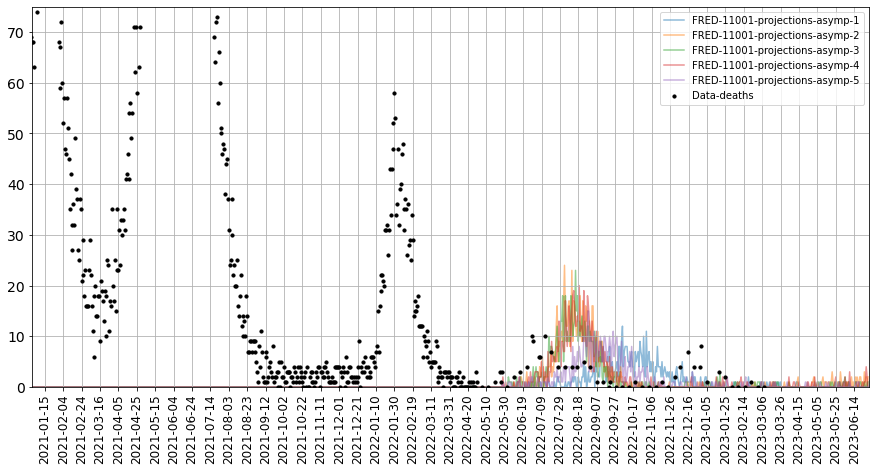

In [49]:
import warnings
#warnings.filterwarnings('ignore')
star_day = dt.datetime(2020,1,1)
death_data = df_data[df_data['MunCode'] == 11001]['Deaths'].to_numpy()

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=7)


#mask = (df_data_UCI['ESTADO'] != 'Abierto') & (df_data_UCI['ESTADO'] != 'En_Traslado')
mask = (df_data_UCI['ESTADO'] == 'Ubicado')
df_aux_UCI = df_data_UCI[mask].groupby('FECHA_SOLICITUD').sum().reset_index()
data_UCI = df_aux_UCI[mask]['SOLICITUDES'].to_numpy()
date_UCI = pd.to_datetime(df_aux_UCI[mask]['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')

#############################################################
death_days = (pd.to_datetime(df_data[df_data['MunCode'] == 11001]['Date']))
##########################################################
no_sce = 0
sce_vec = df_params['intervention_id'].unique()

scenario = sce_vec[no_sce]
print(scenario)
mask = df_params['intervention_id'] == scenario
df_scenario = df_params[mask]

for simul_id in df_scenario['job_id'].to_numpy():
    mask = df['job_id'] == simul_id
    max_df = df[mask]

    days = max_df['Day']
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]

    deaths = pd.np.zeros(len(max_df['CF_mean'].to_numpy()))
    #deaths +=  max_df['CF_mean'].to_numpy()
    for n in [7]:
        deaths += max_df['CF_'+str(n)+'_mean'].to_numpy()
        
#     deaths = pd.np.zeros(len(max_df['CFLoc_1_A0_10'].to_numpy()))
#     age_group = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', '60_70', '80_120']
#     deaths = pd.np.zeros(len(max_df['CFLoc_1_A0_10'].to_numpy()))
#     for age in age_group:
#         deaths += max_df['Chosp'+age].to_numpy()
    
    date_days = pd.np.array(date_days)
    last_days = date_days[date_days > dt.datetime(2021,10,22)]
    
#     if pd.np.max(deaths[-len(last_days):]) > 400:
#         print(simul_id)
#         continue
    
    ### Simulation
    ax.plot(date_days, deaths, alpha = 0.5, zorder = 1, label = simul_id.replace('_','-'))
    
### Data
#ax.scatter(date_UCI, data_UCI, s = 15, color = 'red', zorder = 2)
ax.scatter(death_days, death_data, s = 10, c = 'black', label = 'Data-deaths', zorder = 2)

plt.xticks(pd.date_range(star_day, periods=70, freq='20d'), rotation=90, fontsize=12)
plt.yticks(fontsize=14)

ax.set_xlim(dt.datetime(2021,1,1),dt.datetime(2023,6,30))
ax.set_ylim(0,75)

plt.grid()
plt.legend()

In [21]:
max_df['CF_'+str(n)+'_mean'].unique()

array([0, 1])

#### Filtro simulaciones problematicas

In [ ]:
job_to_eliminate = ['FRED_11001_projections_asymp_193',
                    'FRED_11001_projections_asymp_162',
                    'FRED_11001_projections_asymp_163',
                    'FRED_11001_projections_asymp_169',
                   'FRED_11001_projections_asymp_103',
                   'FRED_11001_projections_asymp_133',
                   'FRED_11001_projections_asymp_223',
                    'FRED_11001_projections_asymp_229',
                    'FRED_11001_projections_asymp_253']

df_filtered = df[~df['job_id'].isin(job_to_eliminate)]
df_params_filtered = df_params[~df_params['job_id'].isin(job_to_eliminate)]
df_params_all_filtered = df_params_all[~df_params_all['job_id'].isin(job_to_eliminate)]

file_1 = '../output/SHORT_FORECAST/'+folder_name+'/fred_output_all.csv'
file_2 = '../output/SHORT_FORECAST/'+folder_name+'/FRED_parameters_out_all.csv'
file_3 = '../output/SHORT_FORECAST/'+folder_name+'/FRED_parameters_all.csv'

df.to_csv(file_1)
df_params.to_csv(file_2)
df_params_all.to_csv(file_3)

file_1 = '../output/SHORT_FORECAST/'+folder_name+'/fred_output.csv'
file_2 = '../output/SHORT_FORECAST/'+folder_name+'/FRED_parameters_out.csv'
file_3 = '../output/SHORT_FORECAST/'+folder_name+'/FRED_parameters.csv'

df_filtered.to_csv(file_1)
df_params_filtered.to_csv(file_2)
df_params_all_filtered.to_csv(file_3)

### Procesamiento simulaciones

In [ ]:
subprocess.run("Rscript ../../fit_scripts/fit.R", shell=True, check=True)

### Carga del procesamiento 

In [ ]:
file = '../../output/fred_output_model_fit.csv'
df_fit = pd.read_csv(file)
df_test = df_fit['intervention_id'].unique()

<span style="color:red"> <h1> Graficas </h1> </span> 
***

### Admisiones UCI por edad

In [ ]:
label = 'omicron_65_cross_1_4_transexec'

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(3,3, sharex=True, tight_layout=True)
fig.suptitle('Admisiones UCI')
fig.set_size_inches(w=17, h=15)

#mask = df_params['intervention_id'] == scenario
mask = df_params['intervention_id'] == df_params['intervention_id'][0]
df_scenario = df_params[mask]
simuls_id = df_scenario['job_id'].to_numpy()

AgeGroups_10 = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', '60_70', '70_80', '80_120']
AgeGroups_5 = ['0_5','5_10','10_15','15_20','20_25','25_30','30_35','35_40','40_45','45_50','50_55','55_60','60_65','65_70','70_75','75_80','80_120']
dict_age = {AgeGroups_10[0]:[AgeGroups_5[0],AgeGroups_5[1]],
           AgeGroups_10[1]:[AgeGroups_5[2],AgeGroups_5[3]],
           AgeGroups_10[2]:[AgeGroups_5[4],AgeGroups_5[5]],
           AgeGroups_10[3]:[AgeGroups_5[6],AgeGroups_5[7]],
           AgeGroups_10[4]:[AgeGroups_5[8],AgeGroups_5[9]],
           AgeGroups_10[5]:[AgeGroups_5[10],AgeGroups_5[11]],
           AgeGroups_10[6]:[AgeGroups_5[12],AgeGroups_5[13]],
           AgeGroups_10[7]:[AgeGroups_5[14],AgeGroups_5[15]],
           AgeGroups_10[8]:[AgeGroups_5[16]]}
counter = 0
for age_10 in AgeGroups_10:
    agegroup_deaths = []
    for simul_id in simuls_id:
        chosp_count= 0
        for age in dict_age[age_10]:
            mask = df['job_id'] == simul_id
            max_df = df[mask]
            num_days = len(max_df['Chosp0_5'].to_numpy())
            days = max_df['Day']
            ###############################################################
            chosp_count += max_df['Chosp'+age].to_numpy() + max_df['Chosp'+age+'_1'].to_numpy()+ max_df['Chosp'+age+'_2'].to_numpy()+ max_df['Chosp'+age+'_3'].to_numpy()+ max_df['Chosp'+age+'_4'].to_numpy()
            #agegroup_deaths.append(max_df['Chosp'+age].to_numpy() + max_df['Chosp'+age+'_1'].to_numpy()+ max_df['Chosp'+age+'_2'].to_numpy()+ max_df['Chosp'+age+'_3'].to_numpy()+ max_df['Chosp'+age+'_4'].to_numpy())
        ###############################################################
        agegroup_deaths.append(chosp_count)
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    agegroup_deaths = pd.np.array(agegroup_deaths)
    deaths_low = []
    deaths_median = []
    deaths_high = []
    for n in range(len(date_days)):
        deaths_low.append(pd.np.percentile(agegroup_deaths[:,n], 2.5, interpolation = 'nearest'))
        deaths_median.append(pd.np.percentile(agegroup_deaths[:,n], 50, interpolation = 'nearest'))
        #deaths_median.append(pd.np.mean(agegroup_deaths[:,n]))
        deaths_high.append(pd.np.percentile(agegroup_deaths[:,n], 97.5, interpolation = 'nearest'))
        
    ax[int(pd.np.floor(counter/3)),counter%3].plot(date_days, deaths_median, zorder = 1, color = 'red')
    ax[int(pd.np.floor(counter/3)),counter%3].fill_between(date_days, deaths_low, deaths_high, alpha = 0.5, interpolate=True)
    ax[int(pd.np.floor(counter/3)),counter%3].set_title(age.replace('_','-'))
    ax[int(pd.np.floor(counter/3)),counter%3].grid()
    plt.setp(ax[int(pd.np.floor(counter/3)),counter%3].get_xticklabels(), rotation=90)
    ax[int(pd.np.floor(counter/3)),counter%3].set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,5,1))
    pd.np.save('obj/simul_data/simul_UCI_'+age_10+'_'+label+'.npy', pd.np.array([date_days, deaths_median]))
    counter += 1
        
# ## Datos
for i in range(8):
    #mask = (df_data_UCI_edad['ESTADO'] != 'Abierto') & (df_data_UCI_edad['ESTADO'] != 'En_Traslado') & (df_data_UCI_edad['EDAD'] >= 10*i) & (df_data_UCI_edad['EDAD'] < 10*(i+1))
    mask = (df_data_UCI_edad['ESTADO'] == 'Ubicado') & (df_data_UCI_edad['EDAD'] >= 10*i) & (df_data_UCI_edad['EDAD'] < 10*(i+1))

    df_aux_UCI = df_data_UCI_edad[mask].groupby(['FECHA_SOLICITUD']).sum().reset_index()
    ###############################################################
    data_UCI = df_aux_UCI['SOLICITUDES'].to_numpy()
    date_UCI = pd.to_datetime(df_aux_UCI['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    ###############################################################
    ax[int(pd.np.floor(i/3)),i%3].scatter(date_UCI, data_UCI, color = 'black', zorder = 2, s = 10)
    pd.np.save('obj/raw_data/data_UCI'+str(10*i)+'_'+str(10*(i+1))+'.npy', pd.np.array([date_UCI, data_UCI]))
    
#mask = (df_data_UCI_edad['ESTADO'] != 'Abierto') & (df_data_UCI_edad['ESTADO'] != 'En_Traslado') & (df_data_UCI_edad['EDAD'] >= 80)
mask = (df_data_UCI_edad['ESTADO'] == 'Ubicado') & (df_data_UCI_edad['EDAD'] >= 80)
df_aux_UCI = df_data_UCI_edad[mask].groupby(['FECHA_SOLICITUD']).sum().reset_index()
###############################################################
data_UCI = df_aux_UCI['SOLICITUDES'].to_numpy()
date_UCI = pd.to_datetime(df_aux_UCI['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
###############################################################
ax[2,2].scatter(date_UCI, data_UCI, color = 'black', zorder = 2, s = 10)

    
ax.set_ylim(0, 15)
ax[0,1].set_ylim(0, 10)
ax[0,2].set_ylim(0, 30)
ax[1,0].set_ylim(0, 60)
ax[1,1].set_ylim(0, 80)
ax[1,2].set_ylim(0, 130)

ax[2,1].set_ylim(0, 70)
ax[2,2].set_ylim(0, 30)

plt.savefig('figures/admisiones_grupo_edad'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

#### Muertes por edad

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(3,3, sharex=True, tight_layout=True)
fig.suptitle('Muertes')
fig.set_size_inches(w=17, h=15)

#mask = df_params['intervention_id'] == scenario
mask = df_params['intervention_id'] == df_params['intervention_id'][0]
df_scenario = df_params[mask]
simuls_id = df_scenario['job_id'].to_numpy()

AgeGroups_10 = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', '60_70', '70_80', '80_120']
AgeGroups_5 = ['0_5','5_10','10_15','15_20','20_25','25_30','30_35','35_40','40_45','45_50','50_55','55_60','60_65','65_70','70_75','75_80','80_120']
dict_age = {AgeGroups_10[0]:[AgeGroups_5[0],AgeGroups_5[1]],
           AgeGroups_10[1]:[AgeGroups_5[2],AgeGroups_5[3]],
           AgeGroups_10[2]:[AgeGroups_5[4],AgeGroups_5[5]],
           AgeGroups_10[3]:[AgeGroups_5[6],AgeGroups_5[7]],
           AgeGroups_10[4]:[AgeGroups_5[8],AgeGroups_5[9]],
           AgeGroups_10[5]:[AgeGroups_5[10],AgeGroups_5[11]],
           AgeGroups_10[6]:[AgeGroups_5[12],AgeGroups_5[13]],
           AgeGroups_10[7]:[AgeGroups_5[14],AgeGroups_5[15]],
           AgeGroups_10[8]:[AgeGroups_5[16]]}
counter = 0
for age_10 in AgeGroups_10:
    agegroup_deaths = []
    for simul_id in simuls_id:
        acf_count = 0
        for age in dict_age[age_10]:
            mask = df['job_id'] == simul_id
            max_df = df[mask]
            num_days = len(max_df['ACF0_5'].to_numpy())
            days = max_df['Day']
            ###############################################################
            acf_count += max_df['ACF'+age].to_numpy()
        ###############################################################
        agegroup_deaths.append(acf_count)
    star_day = dt.datetime(2020,1,1)
    date_days = [star_day + dt.timedelta(days = i) for i in days]
    agegroup_deaths = pd.np.array(agegroup_deaths)
    deaths_low = []
    deaths_median = []
    deaths_high = []
    for n in range(len(date_days)):
        deaths_low.append(pd.np.percentile(agegroup_deaths[:,n], 2.5, interpolation = 'nearest'))
        deaths_median.append(pd.np.percentile(agegroup_deaths[:,n], 50, interpolation = 'nearest'))
        deaths_high.append(pd.np.percentile(agegroup_deaths[:,n], 97.5, interpolation = 'nearest'))
    ax[int(pd.np.floor(counter/3)),counter%3].plot(date_days, deaths_median, zorder = 1)
    ax[int(pd.np.floor(counter/3)),counter%3].fill_between(date_days, deaths_low, deaths_high, alpha = 0.5, interpolate=True)
    counter += 1
        
## Datos
df_data_cases
counter = 0
for age in AgeGroups_10:
    mask = df_data_deaths_age['AgeGroup'] == 'ACF'+age
    age_deaths = df_data_deaths_age[mask]['Deaths'].to_numpy()
    ###############################################################
    date = pd.to_datetime(df_data_deaths_age[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    ###############################################################
    ax[int(pd.np.floor(counter/3)),counter%3].scatter(date, age_deaths, color = 'black', zorder = 2, s = 10)
    ax[int(pd.np.floor(counter/3)),counter%3].set_title(age.replace('_','-'))
    ax[int(pd.np.floor(counter/3)),counter%3].grid()
    plt.setp(ax[int(pd.np.floor(counter/3)),counter%3].get_xticklabels(), rotation=90)
    ax[int(pd.np.floor(counter/3)),counter%3].set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,5,12))
    counter += 1
    
ax.set_ylim(0, 5)
ax[0,1].set_ylim(0, 5)
ax[0,2].set_ylim(0, 10)
ax[1,0].set_ylim(0, 16)
ax[1,1].set_ylim(0, 30)
ax[1,2].set_ylim(0, 70)

ax[2,1].set_ylim(0, 45)
ax[2,2].set_ylim(0, 45)

plt.savefig('figures/muertes_grupo_edad'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
df_fit['intervention_id'].unique()

# Muertes, UCI y hospitalizacion

In [17]:
## Simul post process
file = '../../output/fred_output_model_fit_omicron_lineages_import_test_3.csv'
df_fit = pd.read_csv(file)

## Muertes

In [27]:
df_deaths = pd.read_csv('FRED_deaths.csv')

In [28]:
df_deaths

,date,deaths
0,2020-03-25,0
1,2020-03-26,1
2,2020-03-28,2
3,2020-03-29,0
4,2020-03-30,0
...,...,...
916,2023-01-16,0
917,2023-01-17,0
918,2023-01-19,0
919,2023-01-20,0


In [29]:
# df_deaths = ut.FRED_deaths()
df_deaths['date'] = pd.to_datetime(df_deaths['date'])
df_deaths = df_deaths.sort_values(by='date')

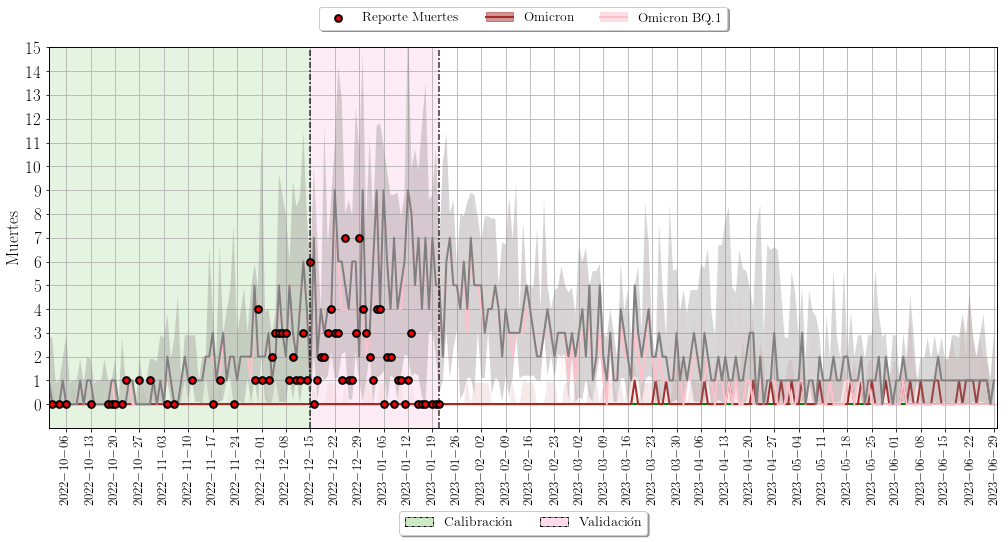

In [32]:
plt.rcParams.update({'font.size': 17})
fig1, ax = plt.subplots()
fig1.set_size_inches(w=17, h=7)

scenario = df_params['intervention_id'].unique()[2]
########################
##### Data setting #####
########################

df_scenario = df_params[df_params['intervention_id'] == scenario]

########################
##### Plot setting #####
########################
P = []
legend_label = []

##################
##### Deaths #####
##################
death_data = df_deaths.deaths
death_days = df_deaths.date
q0 = ax.scatter(death_days, death_data, s = 45, c = 'red', edgecolors='black', linewidths = 2, label = 'Muertes reportadas', zorder = 5)
P.append((q0))
legend_label.append('Reporte Muertes')
ax.legend()

start_day = dt.datetime(2020,1,1)
mask = df_fit['intervention_id'] == scenario

CF_fit_low = df_fit[mask]['CF_low'].to_numpy()
CF_fit_high = df_fit[mask]['CF_high'].to_numpy()
CF_fit_median = df_fit[mask]['CF_median'].to_numpy()

CF_0_fit_low = df_fit[mask]['CF_0_low'].to_numpy()
CF_0_fit_high = df_fit[mask]['CF_0_high'].to_numpy()
CF_0_fit_median = df_fit[mask]['CF_0_median'].to_numpy()

CF_1_fit_low = df_fit[mask]['CF_1_low'].to_numpy()
CF_1_fit_high = df_fit[mask]['CF_1_high'].to_numpy()
CF_1_fit_median = df_fit[mask]['CF_1_median'].to_numpy()

CF_2_fit_low = df_fit[mask]['CF_2_low'].to_numpy()
CF_2_fit_high = df_fit[mask]['CF_2_high'].to_numpy()
CF_2_fit_median = df_fit[mask]['CF_2_median'].to_numpy()

CF_3_fit_low = df_fit[mask]['CF_3_low'].to_numpy()
CF_3_fit_high = df_fit[mask]['CF_3_high'].to_numpy()
CF_3_fit_median = df_fit[mask]['CF_3_median'].to_numpy()

CF_4_fit_low = df_fit[mask]['CF_4_low'].to_numpy()
CF_4_fit_high = df_fit[mask]['CF_4_high'].to_numpy()
CF_4_fit_median = df_fit[mask]['CF_4_median'].to_numpy()

CF_5_fit_low = df_fit[mask]['CF_5_low'].to_numpy()
CF_5_fit_high = df_fit[mask]['CF_5_high'].to_numpy()
CF_5_fit_median = df_fit[mask]['CF_5_median'].to_numpy()

CF_6_fit_low = df_fit[mask]['CF_6_low'].to_numpy()
CF_6_fit_high = df_fit[mask]['CF_6_high'].to_numpy()
CF_6_fit_median = df_fit[mask]['CF_6_median'].to_numpy()

date_CF_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
p1 = ax.plot(date_CF_fit, CF_fit_median,  alpha = 1, zorder = 4, color = 'grey', linewidth = 2)
ax.fill_between(date_CF_fit, CF_fit_low, CF_fit_high, where=CF_fit_high >= CF_fit_low, facecolor='grey', interpolate=True, alpha = 0.3, zorder = 3)

p2 = ax.plot(date_CF_fit, CF_0_fit_median,  alpha = 1, zorder = 2, color = colores[0], linewidth = 2)
ax.fill_between(date_CF_fit, CF_0_fit_low, CF_0_fit_high, where=CF_0_fit_high >= CF_0_fit_low, facecolor=colores[0], interpolate=True, alpha = 0.1)

p3 = ax.plot(date_CF_fit, CF_1_fit_median,  alpha = 1, zorder = 2, color = colores[1], linewidth = 2)
ax.fill_between(date_CF_fit, CF_1_fit_low, CF_1_fit_high, where=CF_1_fit_high >= CF_1_fit_low, facecolor=colores[1], interpolate=True, alpha = 0.1)

p4 = ax.plot(date_CF_fit, CF_2_fit_median,  alpha = 1, zorder = 2, color = colores[2], linewidth = 2)
ax.fill_between(date_CF_fit, CF_2_fit_low, CF_2_fit_high, where=CF_2_fit_high >= CF_2_fit_low, facecolor=colores[2], interpolate=True, alpha = 0.1)

# p5 = ax.plot(date_CF_fit, CF_3_fit_median,  alpha = 1, zorder = 2, color = colores[3], linewidth = 2)
# #ax.fill_between(date_CF_fit, CF_3_fit_low, CF_3_fit_high, where=CF_3_fit_high >= CF_3_fit_low, facecolor=colores[3], interpolate=True, alpha = 0.1)
# p5_1 = ax.fill(pd.np.NaN, pd.np.NaN, color = colores[3], alpha=0.5)
# P.append((p5[0], p5_1[0]))
# legend_label.append('Mu')

# p6 = ax.plot(date_CF_fit, CF_4_fit_median,  alpha = 1, zorder = 2, color = colores[4], linewidth = 2)
# ax.fill_between(date_CF_fit, CF_4_fit_low, CF_4_fit_high, where=CF_4_fit_high >= CF_4_fit_low, facecolor=colores[4], interpolate=True, alpha = 0.5)
# p6_1 = ax.fill(pd.np.NaN, pd.np.NaN, color = colores[4], alpha=0.5)
# P.append((p6[0], p6_1[0]))
# legend_label.append('Delta')

p7 = ax.plot(date_CF_fit, CF_5_fit_median,  alpha = 1, zorder = 2, color = colores[5], linewidth = 2)
ax.fill_between(date_CF_fit, CF_5_fit_low, CF_5_fit_high, where=CF_5_fit_high >= CF_5_fit_low, facecolor=colores[5], interpolate=True, alpha = 0.1)
p7_1 = ax.fill(pd.np.NaN, pd.np.NaN, color = colores[5], alpha=0.5)
P.append((p7[0], p7_1[0]))
legend_label.append('Omicron')

p8 = ax.plot(date_CF_fit, CF_6_fit_median,  alpha = 1, zorder = 3, color = colores[6], linewidth = 2)
ax.fill_between(date_CF_fit, CF_6_fit_low, CF_6_fit_high, where=CF_6_fit_high >= CF_6_fit_low, facecolor=colores[6], interpolate=True, alpha = 0.1)
p8_1 = ax.fill(pd.np.NaN, pd.np.NaN, color = colores[6], alpha=0.5)
P.append((p8[0], p8_1[0]))
legend_label.append('Omicron BQ.1')

### Plot details
# time_labels = pd.date_range(dt.datetime(2020,1,3), periods=55, freq='15d')
time_labels = pd.date_range(dt.datetime(2021,7,1), periods=120, freq='7d')
plt.xticks(time_labels, rotation=90, fontsize=13)
# ax.set_xlim(dt.datetime(2020,3,1),dt.datetime(2021,10,12))
ax.set_xlim(dt.datetime(2022,10,1),dt.datetime(2023,6,30))
ax.set_ylabel('Muertes')

ax.yaxis.set_ticks(pd.np.arange(0,20,1))
ax.set_ylim(-1, 15)

## Area de validación
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.axvline(x = death_days.tolist()[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
ax.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

ax.fill_between(date_CF_fit, 0, 1, where = (date_CF_fit >= fit_date) & (date_CF_fit <= death_days.tolist()[-1]),
                 facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
ax.fill_between(date_CF_fit, 0, 1, where = (date_CF_fit <= fit_date),
                 facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

## Legend
ax.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.125),
          fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
ax2 = ax.twinx()
q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
ax2.get_yaxis().set_visible(False)
ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=7, fontsize = 14)
ax.grid()

### Guardar grafica
plt.savefig('figures/muertes_omicron.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

## Muertes escenarios

In [ ]:
all_sub_scenarios = True

scenario_family = 'omicron-cross-065'
scenario_family_label = 'Escape_inmune_35'

directory = 'figures/'+scenario_family_label
if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory '%s' created" %directory)
    
directory = 'summary_projections/'+scenario_family_label
if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory '%s' created" %directory)

mask = df_fit['intervention_id'].str[0:len(scenario_family)] == scenario_family
unique_sce = [sce_i for sce_i in df_fit[mask]['intervention_id'].unique()]

num_unique_sce = len(unique_sce)
scenarios = pd.np.array([])

#####################################################
sce_order = ['mov_open_school']
######################################################
counter = 0
for order in sce_order:
    for sce in unique_sce:
        if order == sce[-len(order):]:
            scenarios = pd.np.append(scenarios,[sce])

sub_scenarios = ['mov_base', 'mov_open_school']

dic_sce = {'mov_base':'     base',
           'mov_open_school': 'Estado basal'}

dic_sce_df = {'mov_base':'     Estado basal',
             'mov_open_school': 'Estado basal'}
##############################################################
death_data = df_data[df_data['MunCode'] == 11001]['Deaths'].to_numpy()
# ICU_data = df_data_ICU['ICU_admissions'].to_numpy()
hosp_data = df_data_hosp['Camas Ocupadas COVID 19'].to_numpy()
#############################################################
death_days = (pd.to_datetime(df_data[df_data['MunCode'] == 11001]['Date'])).to_numpy()
# ICU_days = (pd.to_datetime(df_data_ICU['Date'])).to_numpy()
hosp_days = pd.to_datetime(df_data_hosp['Fecha'], format='%d/%m/%Y').to_numpy()
##########################################################

plt.rcParams.update({'font.size': 17})
fig1, ax = plt.subplots()
fig1.set_size_inches(w=17, h=7)

counter = 0
P = []
legend_label = []

### Muertes reportadas
p3 = ax1.scatter(death_days, death_data, s = 20, c = 'black', zorder = 8, alpha = 0.7)
P.append((p3))
legend_label.append('Muertes reportadas')

if all_sub_scenarios == False:
    mask = df_params['intervention_id'] == scenario
    date_death_fit = pd.to_datetime(df_fit[df_fit['intervention_id'] == scenario]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    deaths = []
    for simul_id in df_params[mask]['job_id'].to_numpy():
        mask = df['job_id'] == simul_id
        max_df = df[mask]    
        dths = max_df['CF_mean'].to_numpy()
        for n in range(1,5):
            dths += max_df['CF_'+str(n)+'_mean'].to_numpy()
        deaths.append(dths)
    deaths = pd.np.array(deaths)
    
    for n in range(len(deaths[0,:])):
        deaths[:,n] = pd.np.sort(deaths[:,n])
    
    death_fit_low = deaths[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(deaths)+1)-1, 2.5), 0)),:]
    death_fit_high = deaths[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(deaths)+1)-1, 97.5), 0)),:] 
    death_fit_median = deaths[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(deaths)+1)-1, 50), 0)),:]

    ## Calibracion
    days = date_death_fit[date_death_fit <= fit_date]
    num_days_cal = len(days)
    p2 = ax1.plot(days, death_fit_median[0:num_days_cal], alpha = 1, zorder = 1, color = 'green', linewidth = 3)
    ax1.fill_between(days, death_fit_low[0:num_days_cal], death_fit_high[0:num_days_cal], where=death_fit_high[0:num_days_cal] >= death_fit_low[0:num_days_cal], facecolor = plt.cm.Pastel1(2), interpolate=True, alpha = 0.8)
    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = plt.cm.Pastel1(2), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Calibración')
    
    ## Validacion
    days = date_death_fit[(date_death_fit >= fit_date) & (date_death_fit <= projection_date)]
    num_days_val = num_days_cal+len(days)
    p5 = ax1.plot(days, death_fit_median[num_days_cal - 1:num_days_val - 1], alpha = 1, zorder = 1, color = colores[counter+1], linewidth = 3)
    ax1.fill_between(days, death_fit_low[num_days_cal - 1:num_days_val - 1], death_fit_high[num_days_cal - 1:num_days_val - 1], where=death_fit_high[num_days_cal - 1:num_days_val - 1] >= death_fit_low[num_days_cal - 1:num_days_val - 1], facecolor = colores[counter+1], interpolate=True, alpha = 0.2)
    p4 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter+1], alpha=0.5)
#     P.append((p4[0], p5[0]))
#     legend_label.append('Validación')
    
    ## Proyeccion
    days = date_death_fit[date_death_fit > projection_date]
    p5 = ax1.plot(days, death_fit_median[num_days_val - 1:], alpha = 1, zorder = 1, color = colores[counter+2], linewidth = 3)
    ax1.fill_between(days, death_fit_low[num_days_val - 1:], death_fit_high[num_days_val - 1:], where=death_fit_high[num_days_val - 1:] >= death_fit_low[num_days_val - 1:], facecolor = colores[counter+2], interpolate=True, alpha = 0.2)
    p4 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter+2], alpha=0.5)
#     P.append((p4[0], p5[0]))
#     legend_label.append('Proyeccion')
    
    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_xlim(dt.datetime(2020,3,1), fit_date)
    ax1.set_ylabel('Muertes')
    ax1.yaxis.set_ticks(pd.np.arange(0,390,30))
    ax1.set_ylim(-5, 225)

    ## Legend
    ax1.legend(P, legend_label, loc='upper left', fontsize = 14)
    ax1.grid()

    ### Guardar grafica
    plt.savefig('figures/muertes_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
    
else:
    counter_label = 0
    for sce in scenarios:
        mask = df_fit['intervention_id'] == sce
        
        death_fit_low = df_fit[mask]['CF_low'].to_numpy() 
        death_fit_high = df_fit[mask]['CF_high'].to_numpy() 
        death_fit_median = df_fit[mask]['CF_median'].to_numpy() 

        date_death_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')       
        p2 = ax1.plot(date_death_fit, death_fit_median, alpha = 1, zorder = 1+num_unique_sce-counter, color = colores[counter], linewidth = 2)
        alp = 0.2
        ax1.fill_between(date_death_fit, death_fit_low, death_fit_high, alpha = alp, where=death_fit_high >= death_fit_low, zorder = 2+num_unique_sce-counter, facecolor = colores[counter], interpolate=True)

        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))
        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce[mo.span()[0]:]])
        counter += 1
        
        fixed_columns = ['Fecha', 'Compartimento', 'Valor Promedio', 'Limite Superior', 'Limite Inferior']
        df_proj_deaths = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])

        df_proj_deaths['Fecha'] = date_death_fit
        df_proj_deaths['Valor Promedio'] = pd.np.round(death_fit_median, 2)
        df_proj_deaths['Limite Superior'] = pd.np.round(death_fit_high, 2)
        df_proj_deaths['Limite Inferior'] = pd.np.round(death_fit_low, 2)
        df_proj_deaths['Compartimento'] = 'Muerte'
        df_proj_deaths = df_proj_deaths[fixed_columns]

        df_proj_deaths = df_proj_deaths[(df_proj_deaths['Fecha'] > '2021-07-01') & (df_proj_deaths['Fecha'] < '2022-01-30')]

        match_str = re.compile(r'mov_+')
        mo = match_str.search(sce)
        df_proj_deaths.to_csv('summary_projections/'+scenario_family_label+'/muertes_'+scenario_family_label+'_'+dic_sce_df[sce[mo.span()[0]:]]+'.csv', index = False)

    ### Plot details
    # time_labels = pd.date_range(dt.datetime(2020,1,3), periods=55, freq='15d')
    time_labels = pd.date_range(dt.datetime(2021,7,1), periods=120, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    # ax1.set_xlim(dt.datetime(2020,3,1),dt.datetime(2021,10,12))
    ax1.set_xlim(dt.datetime(2021,7,1),dt.datetime(2022,7,15))
    ax1.set_ylabel('Muertes')
    ax1.yaxis.set_ticks(pd.np.arange(0,1000,30))
    # ax1.set_ylim(-5, 275)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x = death_days[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_death_fit, 0, 1, where = (date_death_fit >= fit_date) & (date_death_fit <= death_days[-1]),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_death_fit, 0, 1, where = (date_death_fit <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.125),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.20),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid()

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/muertes_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

## UCI

In [ ]:
################################################
mask = (df_data_UCI['ESTADO'] != 'Abierto') & (df_data_UCI['ESTADO'] != 'En_Traslado')
df_aux_UCI = df_data_UCI[mask].groupby('FECHA_SOLICITUD').sum().reset_index()
data_UCI = df_aux_UCI['SOLICITUDES'].to_numpy()
date_UCI = pd.to_datetime(df_aux_UCI[mask]['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
################################################
plt.rcParams.update({'font.size': 17})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

counter = 0
P = []
legend_label = []

### Muertes reportadas
p3 = ax1.scatter(date_UCI, data_UCI, s = 15, color = 'black', zorder = 2)
P.append((p3))
legend_label.append('Solicitudes UCI reportadas')

if all_sub_scenarios == False:
    mask = df_params['intervention_id'] == scenario
    mask_fit = df_fit['intervention_id'] == scenario

    ucis = []
    for simul_id in df_params[mask]['job_id'].to_numpy():
        mask = df['job_id'] == simul_id
        max_df = df[mask]    
        uci_job = max_df['Chosp_mean'].to_numpy()
        for n in range(1,5):
            uci_job += max_df['Chosp_'+str(n)+'_mean'].to_numpy()
        ucis.append(uci_job)
    ucis = pd.np.array(ucis)
    
    days = max_df['Day'].to_numpy()
    star_day = dt.datetime(2020,1,1)
    date_UCI_fit = [star_day + dt.timedelta(days = int(i)) for i in days]
    
    for n in range(len(ucis[0,:])):
        ucis[:,n] = pd.np.sort(ucis[:,n])
    
    UCI_fit_low = ucis[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(ucis)+1)-1, 2.5), 0)),:] + df_fit[mask_fit]['UCI_Cancelled_low'].to_numpy() 
    UCI_fit_high = ucis[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(ucis)+1)-1, 97.5), 0)),:] + df_fit[mask_fit]['UCI_Cancelled_high'].to_numpy() 
    UCI_fit_median = ucis[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(ucis)+1)-1, 50), 0)),:] + df_fit[mask_fit]['UCI_Cancelled_median'].to_numpy() 


    # ax1.plot(date_UCI_fit, UCI_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
    p2 = ax1.plot(date_UCI_fit, UCI_fit_median,  alpha = 1, zorder = 2, color = 'purple', linewidth = 3)
    # ax1.plot(date_UCI_fit, UCI_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

    ax1.fill_between(date_UCI_fit, UCI_fit_low, UCI_fit_high, where=UCI_fit_high >= UCI_fit_low, facecolor=plt.cm.Pastel1(7), 
                     interpolate=True, alpha = 0.8)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = plt.cm.Pastel1(2), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Validación')
    
    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_ylabel('Solicitudes UCI')
    ax1.yaxis.set_ticks(pd.np.arange(0, 420,30))
    ax1.set_ylim(-5, 400)
    ax1.set_xlim(dt.datetime(2020,6,1), fit_date)

    ## Legend
    ax1.legend(P, legend_label, loc='upper left', fontsize = 13.5)
    ax1.grid()

    ### Guardar grafica
    plt.savefig('figures/solicitudes_UCI_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
    
else:
    counter_label = 0
    for sce in scenarios:
        mask = df_fit['intervention_id'] == sce

        UCI_fit_low = df_fit[mask]['Chosp_low'].to_numpy() 
        UCI_fit_high = df_fit[mask]['Chosp_high'].to_numpy() 
        UCI_fit_median = df_fit[mask]['Chosp_median'].to_numpy() 

        date_UCI_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
        # ax1.plot(date_UCI_fit, UCI_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
        p2 = ax1.plot(date_UCI_fit, UCI_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 3)
        # ax1.plot(date_UCI_fit, UCI_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

        ax1.fill_between(date_UCI_fit, UCI_fit_low, UCI_fit_high, where=UCI_fit_high >= UCI_fit_low, alpha = 0.2, facecolor=colores[counter], interpolate=True)

        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))

        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce[mo.span()[0]:]])
            
        counter += 1
        
        fixed_columns = ['Fecha', 'Compartimento', 'Valor Promedio', 'Limite Superior', 'Limite Inferior']
        df_proj_ICU = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])

        df_proj_ICU['Fecha'] = date_UCI_fit
        df_proj_ICU['Valor Promedio'] =pd.np.round(UCI_fit_median, 2)
        df_proj_ICU['Limite Superior'] = pd.np.round(UCI_fit_high, 2)
        df_proj_ICU['Limite Inferior'] = pd.np.round( UCI_fit_low, 2)
        df_proj_ICU['Compartimento'] = 'Solicitudes ICU'
        df_proj_ICU = df_proj_ICU[fixed_columns]

        df_proj_ICU = df_proj_ICU[(df_proj_ICU['Fecha'] > '2021-07-01') & (df_proj_ICU['Fecha'] < '2022-01-30')]

        df_proj_ICU.to_csv('summary_projections/'+scenario_family_label+'/solicitudes_UCI_'+scenario_family_label+'_'+dic_sce_df[sce[mo.span()[0]:]]+'.csv', index = False)

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,3,15))
    ax1.set_ylabel('Solicitudes UCI')
    ax1.yaxis.set_ticks(pd.np.arange(0,900,40))
    # ax1.set_ylim(-5, 275)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x = date_UCI[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_UCI_fit, 0, 1, where = (date_UCI_fit >= fit_date) & (date_death_fit <= date_UCI[-1]),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_UCI_fit, 0, 1, where = (date_UCI_fit <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.145),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid()   

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/solicitudes_UCI_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
plt.rcParams.update({'font.size': 20})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

counter = 0
P = []
legend_label = []

#############################################################
mask = df_data_UCI['ESTADO'] == 'Ubicado'
data_UCI = df_data_UCI[mask]['SOLICITUDES'].to_numpy()
date_UCI = pd.to_datetime(df_data_UCI[mask]['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
#############################################################

### Admisiones reportadas
p3 = ax1.scatter(date_UCI, data_UCI, s = 15, color = 'black', zorder = 2)
P.append((p3))
legend_label.append('Admisiones UCI reportadas')

if all_sub_scenarios == False:
    mask = df_params['intervention_id'] == scenario
    ucis = []
    for simul_id in df_params[mask]['job_id'].to_numpy():
        mask = df['job_id'] == simul_id
        max_df = df[mask]    
        uci_job = max_df['Chosp_mean'].to_numpy()
        for n in range(1,5):
            uci_job += max_df['Chosp_'+str(n)+'_mean'].to_numpy()
        ucis.append(uci_job)
    ucis = pd.np.array(ucis)
    
    for n in range(len(ucis[0,:])):
        ucis[:,n] = pd.np.sort(ucis[:,n])
    
    days = max_df['Day'].to_numpy()
    star_day = dt.datetime(2020,1,1)
    date_UCI_fit = [star_day + dt.timedelta(days = int(i)) for i in days]
    
    UCI_adm_fit_low = ucis[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(ucis)+1, 1)-1, 2.5), 0)),:]
    UCI_adm_fit_high = ucis[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(ucis)+1, 1)-1, 97.5), 0)),:] 
    UCI_adm_fit_median = ucis[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(ucis)+1, 1)-1, 50), 0)),:]
    
    # ax1.plot(date_UCI_fit, UCI_adm_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
    p2 = ax1.plot(date_UCI_fit, UCI_adm_fit_median,  alpha = 1, zorder = 2, color = 'purple', linewidth = 3)
    # ax1.plot(date_UCI_fit, UCI_adm_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

    ax1.fill_between(date_UCI_fit, UCI_adm_fit_low, UCI_adm_fit_high, where=UCI_adm_fit_high >= UCI_adm_fit_low,
                     facecolor=plt.cm.Pastel1(7), interpolate=True, alpha = 0.8)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color =plt.cm.Pastel1(2), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Validación')
    
    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_ylabel('Admisiones UCI')
    ax1.yaxis.set_ticks(pd.np.arange(0, 420,30))
    ax1.set_ylim(-5, 270)
    ax1.set_xlim(dt.datetime(2020,6,1), fit_date)

    ## Legend
    ax1.legend(P, legend_label, loc='upper left', fontsize = 13.5)
    ax1.grid()
    
    ### Guardar grafica
    plt.savefig('figures/admisiones_UCI_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
    
else:
    counter_label = 0
    for sce in scenarios:
        mask = df_fit['intervention_id'] == sce

        UCI_adm_fit_low = df_fit[mask]['Chosp_low'].to_numpy()
        UCI_adm_fit_high = df_fit[mask]['Chosp_high'].to_numpy()
        UCI_adm_fit_median = df_fit[mask]['Chosp_median'].to_numpy()

        date_UCI_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
        # ax1.plot(date_UCI_fit, UCI_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
        p2 = ax1.plot(date_UCI_fit, UCI_adm_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 3)
        # ax1.plot(date_UCI_fit, UCI_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

        ax1.fill_between(date_UCI_fit, UCI_adm_fit_low, UCI_adm_fit_high, alpha = 0.2, where=UCI_adm_fit_high >= UCI_adm_fit_low, 
                         facecolor=colores[counter], interpolate=True)

        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))
        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce[mo.span()[0]:]])
        counter += 1
        
        fixed_columns = ['Fecha', 'Compartimento', 'Valor Promedio', 'Limite Superior', 'Limite Inferior']
        df_proj_ICU_adm = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])

        df_proj_ICU_adm['Fecha'] = date_UCI_fit
        df_proj_ICU_adm['Valor Promedio'] =pd.np.round(UCI_adm_fit_median, 2)
        df_proj_ICU_adm['Limite Superior'] = pd.np.round(UCI_adm_fit_high, 2)
        df_proj_ICU_adm['Limite Inferior'] = pd.np.round( UCI_adm_fit_low, 2)
        df_proj_ICU_adm['Compartimento'] = 'Admisiones ICU'
        df_proj_ICU_adm = df_proj_ICU_adm[fixed_columns]

        df_proj_ICU_adm = df_proj_ICU[(df_proj_ICU_adm['Fecha'] > '2021-07-01') & (df_proj_ICU_adm['Fecha'] < '2022-01-30')]

        df_proj_ICU_adm.to_csv('summary_projections/'+scenario_family_label+'/admisiones_UCI_'+scenario_family_label+'_'+dic_sce_df[sce[mo.span()[0]:]]+'.csv', index = False)

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,3,15))
    ax1.set_ylabel('Admisiones UCI')
    ax1.yaxis.set_ticks(pd.np.arange(0,600,40))
    # ax1.set_ylim(-5, 275)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x = date_UCI[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_UCI_fit, 0, 1, where = (date_UCI_fit >= fit_date) & (date_death_fit <= date_UCI[-1]),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_UCI_fit, 0, 1, where = (date_UCI_fit <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.145),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid()

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/admisiones_UCI_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
# plt.rcParams.update({'font.size': 20})
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(w=17, h=7)

# df_uci_old = pd.read_csv('../fred_uci.csv')

# mask = df_uci_old['ESTADO'] == 'Ubicado'
# soli = df_uci_old[mask]['SOLICITUDES'].to_numpy()
# days = pd.to_datetime(df_uci_old[mask]['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
# ax1.scatter(days, soli, s = 15, color = 'red', zorder = 2)

# mask = df_uci_old['ESTADO'] == 'Cerrado'
# soli = df_uci_old[mask]['SOLICITUDES'].to_numpy()
# days = pd.to_datetime(df_uci_old[mask]['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
# ax1.scatter(days, soli, s = 15, color = 'green', zorder = 2)

# mask = df_uci_old['ESTADO'] == 'Abierto'
# soli = df_uci_old[mask]['SOLICITUDES'].to_numpy()
# days = pd.to_datetime(df_uci_old[mask]['FECHA_SOLICITUD'].to_numpy(), format='%Y-%m-%d', errors='coerce')
# ax1.scatter(days, soli, s = 15, color = 'blue', zorder = 2)

# aux1 = df_data_UCI['ICU_cancelled'].to_numpy()
# ax1.scatter(date_UCI, aux1, s = 15, color = 'blue', zorder = 2)

# ax1.scatter(date_UCI, data_UCI, s = 15, color = 'black', zorder = 2)

### Hospitalizations

In [ ]:
plt.rcParams.update({'font.size': 17})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

counter = 0
P = []
legend_label = []

### Hosp reportadas
p3 = ax1.scatter(hosp_days, hosp_data, c = 'black', label = 'Hospitalizacion', zorder = 2, s = 15)
P.append((p3))
legend_label.append('Hospitalizaciones reportadas')

if all_sub_scenarios == False:
    mask = df_fit['intervention_id'] == scenario

    phosp_fit_low = df_fit[mask]['Phosp_low'].to_numpy()
    phosp_fit_high = df_fit[mask]['Phosp_high'].to_numpy() 
    phosp_fit_median = df_fit[mask]['Phosp_median'].to_numpy()

    date_phosp_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    p2 = ax1.plot(date_phosp_fit, phosp_fit_median,  alpha = 1, zorder = 2, color = 'purple', linewidth = 3)

    ax1.fill_between(date_phosp_fit, phosp_fit_low, phosp_fit_high, where=phosp_fit_high >= phosp_fit_low, 
                     facecolor=plt.cm.Pastel1(2), interpolate=True, alpha = 0.8)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = plt.cm.Pastel1(7), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Validación')
    
    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_ylabel('Hospitalizaciones')
    ax1.yaxis.set_ticks(pd.np.arange(0, 3000, 200))
    ax1.set_ylim(-5, 3000)
    ax1.set_xlim(dt.datetime(2020,6,1), fit_date)

    ## Legend
    ax1.legend(P, legend_label, loc='upper left', fontsize = 13.5)
    ax1.grid()
    
    ### Guardar grafica
    plt.savefig('figures/hospitalizaciones_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
else:
    counter_label = 0
    for sce in scenarios:
        mask = df_fit['intervention_id'] == sce

        phosp_fit_low = df_fit[mask]['Phosp_low'].to_numpy()
        phosp_fit_high = df_fit[mask]['Phosp_high'].to_numpy() 
        phosp_fit_median = df_fit[mask]['Phosp_median'].to_numpy()

        date_phosp_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
        p2 = ax1.plot(date_phosp_fit, phosp_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 2)

        ax1.fill_between(date_phosp_fit, phosp_fit_low, phosp_fit_high, where=phosp_fit_high >= phosp_fit_low, facecolor=colores[counter], interpolate=True, alpha = 0.2)

        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))
        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce[mo.span()[0]:]])
        counter += 1
        
        fixed_columns = ['Fecha', 'Compartimento', 'Valor Promedio', 'Limite Superior', 'Limite Inferior']
        df_proj_ICU_adm = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])

        df_proj_ICU_adm['Fecha'] = date_UCI_fit
        df_proj_ICU_adm['Valor Promedio'] =pd.np.round(phosp_fit_median, 2)
        df_proj_ICU_adm['Limite Superior'] = pd.np.round(phosp_fit_high, 2)
        df_proj_ICU_adm['Limite Inferior'] = pd.np.round(phosp_fit_low, 2)
        df_proj_ICU_adm['Compartimento'] = 'Admisiones ICU'
        df_proj_ICU_adm = df_proj_ICU_adm[fixed_columns]

        df_proj_ICU_adm = df_proj_ICU[(df_proj_ICU_adm['Fecha'] > '2021-07-01') & (df_proj_ICU_adm['Fecha'] < '2022-01-30')]

        df_proj_ICU_adm.to_csv('summary_projections/'+scenario_family_label+'/hospitalizaciones_'+scenario_family_label+'_'+dic_sce_df[sce[mo.span()[0]:]]+'.csv', index = False)


    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=11.5)
    ax1.set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,3,15))
    ax1.set_ylabel('Hospitalizaciones')
    ax1.yaxis.set_ticks(pd.np.arange(0, 3000, 200))
    ax1.set_ylim(-5, 3000)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x = hosp_days[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_phosp_fit, 0, 1, where = (date_phosp_fit >= fit_date) & (date_phosp_fit <= hosp_days[-1]),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_phosp_fit, 0, 1, where = (date_phosp_fit <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.145),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid()

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/hospitalizaciones_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

### Rt

In [ ]:
all_sub_scenarios = True

In [ ]:
plt.rcParams.update({'font.size': 17})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

df_Rt_mean = pd.read_csv('../output/Rt_data/mean_Rt.csv')

####################################################
mask = data_Rt['Localidad'] == 'Bogota D.C.'
dias_Rt = pd.to_datetime(data_Rt[mask]['Fecha_Fin_Ventana'], format='%d/%m/%Y', errors='coerce').to_numpy()
datos_Rt = data_Rt[mask]['Mean(R)']
####################################################

counter = 0
P = []
legend_label = []

### Rt reportadas
p3 = ax1.plot(dias_Rt, datos_Rt, marker='o', markeredgecolor='black', markerfacecolor='none', alpha =0.8, color = 'black', linewidth = 2)
P.append((p3[0]))
legend_label.append('R(t) reportado')

if all_sub_scenarios == False:
    mask = df_params['intervention_id'] == scenario
    df_scenario = df_params[mask]
    simuls_id = df_scenario['job_id'].to_numpy()

    whole_data_cases = []
    for simul_id in simuls_id:
        mask = df['job_id'] == simul_id
        max_df = df[mask]
        days = max_df['Day']
        star_day = dt.datetime(2020,1,1)
        date_days = [star_day + dt.timedelta(days = i) for i in days]

        AgeGroups = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', '60_70', '70_80', '80_120']
        cases = pd.np.zeros(len(max_df['ACF0_10'].to_numpy()))

        for loc in range(1,21):
            for age in AgeGroups:
                cases += max_df['CasesLoc_'+str(loc)+'_A'+age].to_numpy()

        whole_data_cases.append(cases)

    date_days = pd.np.array(date_days)
    num_days = len(days)
    whole_data_cases = pd.np.array(whole_data_cases)
    mean_cases = pd.np.zeros(num_days)

    rt_data = []
    for n in range(len(simuls_id)):
        df_cases = pd.DataFrame(columns = ['dates', 'I'])
        df_cases['dates'] = days
        df_cases['I'] = whole_data_cases[n,:]
        df_cases.to_csv('./output/Rt_data/df_cases.csv', index = False)
        ###############################################################################
        subprocess.run("Rscript ./output/Rt_data/Rt.R data_Rt", shell=True, check=True)
        ###############################################################################
        df_Rt_data = pd.read_csv('./output/Rt_data/data_Rt.csv')
        rt_data.append(df_Rt_data['Mean(R)'].to_numpy())
    rt_data = pd.np.array(rt_data) 

    rt_mean = pd.np.zeros(len(rt_data[0,:]))
    for n in range(len(rt_data[0,:])):
        rt_data[:,n] = pd.np.sort(rt_data[:,n])
        #rt_mean[n] = pd.np.mean(rt_data[:,n])

    ####################################################
    date_rt = pd.to_datetime(df_Rt_mean['Fecha_Fin_Ventana']).to_numpy()
    rt_low = rt_data[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(rt_data)+1)-1, 2.5), 0)),:]
    rt_high = rt_data[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(rt_data)+1)-1, 97.5), 0)),:]
    rt_high = rt_data[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(rt_data)+1)-1, 50), 0)),:]

    p2 = ax1.plot(date_rt, rt_mean,  zorder = 1, color = 'purple', linewidth = 3)
    ax1.fill_between(date_rt, rt_low, rt_high, where=rt_high >= rt_low, facecolor=plt.cm.Pastel1(7), interpolate=True, alpha = 0.8)
    ####################################################
    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = plt.cm.Pastel1(2), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Validación')
    
    ### Plot details
    ax1.axhline(y = 1, color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_ylabel('R(t)')
    ax1.yaxis.set_ticks(pd.np.arange(0, 2.5, 0.25))
    ax1.set_ylim(0.25, 2.5)
    ax1.set_xlim(dt.datetime(2020,3,1), fit_date)

    ## Legend
    ax1.legend(P, legend_label, loc='upper right', fontsize = 13.5)
    ax1.grid()
    
    ### Guardar grafica
    plt.savefig('figures/Rt_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
else:
    counter_label = 0
    for sce in scenarios:
        mask = df_params['intervention_id'] == sce
        df_scenario = df_params[mask]
        simuls_id = df_scenario['job_id'].to_numpy()

        whole_data_cases = []
        for simul_id in simuls_id:
            mask = df['job_id'] == simul_id
            max_df = df[mask]
            days = max_df['Day']
            star_day = dt.datetime(2020,1,1)
            date_days = [star_day + dt.timedelta(days = i) for i in days]

            AgeGroups = []
            for i in range(16):
                AgeGroups.append(str(5*i)+'_'+str(5*(i+1)))
            AgeGroups.append('80_120')
            cases = pd.np.zeros(len(max_df['ACF0_5'].to_numpy()))
#             AgeGroups = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', '60_70', '70_80', '80_120']
            
            for loc in range(1,21):
                for age in AgeGroups:
                    cases += max_df['CasesLoc_'+str(loc)+'_A'+age].to_numpy()

            whole_data_cases.append(cases)
            
        date_days = pd.to_datetime(date_days)
        num_days = len(days)
        whole_data_cases = pd.np.array(whole_data_cases)
        mean_cases = pd.np.zeros(num_days)

        rt_data = []
        for n in range(len(simuls_id)):
            df_cases = pd.DataFrame(columns = ['dates', 'I'])
            df_cases['dates'] = days
            df_cases['I'] = whole_data_cases[n,:]
            df_cases.to_csv('../output/Rt_data/df_cases.csv', index = False)
            ###############################################################################
            subprocess.run("Rscript ../output/Rt_data/Rt.R data_Rt", shell=True, check=True)
            ###############################################################################
            df_Rt_data = pd.read_csv('../output/Rt_data/data_Rt.csv')
            rt_data.append(df_Rt_data['Mean(R)'].to_numpy())
        rt_data = pd.np.array(rt_data) 

        rt_mean = pd.np.zeros(len(rt_data[0,:]))
        for n in range(len(rt_data[0,:])):
            rt_data[:,n] = pd.np.sort(rt_data[:,n])
            rt_mean[n] = pd.np.mean(rt_data[:,n])

        ####################################################
        date_rt = pd.to_datetime(df_Rt_data['Fecha_Fin_Ventana'])
        rt_low = rt_data[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(rt_data)+1), 2.5)-1, 0)),:]
        rt_high = rt_data[int(pd.np.round(pd.np.percentile(pd.np.arange(1,len(rt_data)+1), 97.5)-1, 0)),:]

        p2 = ax1.plot(date_rt, rt_mean, zorder = 1, color = colores[counter], linewidth = 2)
        ax1.fill_between(date_rt, rt_low, rt_high, where=rt_high >= rt_low, facecolor=colores[counter], interpolate=True, alpha = 0.2)
        ####################################################   
        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))
        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce.replace(scenario_family+'delta-vax_1-','')])
        counter += 1

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_xlim(dt.datetime(2021,3,1),dt.datetime(2022,3,10))
    ax1.set_ylabel('Rt')
#     ax1.yaxis.set_ticks(pd.np.arange(0, 3000, 200))
    ax1.set_ylim(0.25, 2.35)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x = dias_Rt[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_rt, 0, 1, where = (date_rt >= fit_date) & (date_rt <= dias_Rt[-1]),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_rt, 0, 1, where = (date_rt <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)
    
    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.145),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax1.axhline(y = 1, color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid()

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/Rt_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
plt.rcParams.update({'font.size': 17})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

df_Rt_mean = pd.read_csv('../output/Rt_data/mean_Rt.csv')

####################################################
mask = data_Rt['Localidad'] == 'Bogota D.C.'
dias_Rt = pd.to_datetime(data_Rt[mask]['Fecha_Fin_Ventana'], format='%d/%m/%Y', errors='coerce').to_numpy()
datos_Rt = data_Rt[mask]['Mean(R)']
####################################################

counter = 0
P = []
legend_label = []

### Rt reportadas
p3 = ax1.plot(dias_Rt, datos_Rt, marker='o', markeredgecolor='black', markerfacecolor='none', alpha =0.8, color = 'black', linewidth = 2)
P.append((p3[0]))
legend_label.append('R(t) reportado')


counter_label = 0
for sce in scenarios:
    mask = df_fit['intervention_id'] == sce

    death_fit_median = df_fit[mask]['RR_total'].to_numpy() 
    date_death_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')       
    p2 = ax1.plot(date_death_fit, death_fit_median, alpha = 1, zorder = 1+num_unique_sce-counter, color = colores[counter], linewidth = 2)
    alp = 0.2
    #ax1.fill_between(date_death_fit, death_fit_low, death_fit_high, alpha = alp, where=death_fit_high >= death_fit_low, zorder = 2+num_unique_sce-counter, facecolor = colores[counter], interpolate=True)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append(dic_sce['mov_base'])
    counter_label += 1

### Plot details
time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
plt.xticks(time_labels, rotation=90, fontsize=13)
ax1.set_xlim(dt.datetime(2021,3,1),dt.datetime(2022,7,10))
ax1.set_ylabel('Rt')
#     ax1.yaxis.set_ticks(pd.np.arange(0, 3000, 200))
ax1.set_ylim(0.25, 2.5)

## Area de validación
trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
ax1.axvline(x = dias_Rt[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

ax1.fill_between(date_rt, 0, 1, where = (date_rt >= fit_date) & (date_rt <= dias_Rt[-1]),
                 facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
ax1.fill_between(date_rt, 0, 1, where = (date_rt <= fit_date),
                 facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

## Legend
ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.125),
          fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
ax2 = ax1.twinx()
q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
ax2.get_yaxis().set_visible(False)
ax1.axhline(y = 1, color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=7, fontsize = 14)
ax1.grid()

### Guardar grafica
plt.savefig('figures/'+scenario_family_label+'/Rt_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

### AR

In [ ]:
plt.rcParams.update({'font.size': 20})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

counter = 0
P = []
legend_label = []

if all_sub_scenarios == False:
    mask = df_fit['intervention_id'] == scenario

    AR_fit_low = df_fit[mask]['AR_low'].to_numpy()
    AR_fit_high = df_fit[mask]['AR_high'].to_numpy() 
    AR_fit_median = df_fit[mask]['AR_median'].to_numpy()

    date_AR_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    p2 = ax1.plot(date_AR_fit, AR_fit_median,  alpha = 1, zorder = 2, color = 'purple', linewidth = 3)

    ax1.fill_between(date_AR_fit, AR_fit_low, AR_fit_high, where=AR_fit_high >= AR_fit_low, 
                     facecolor=plt.cm.Pastel1(7), interpolate=True, alpha = 0.8)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = plt.cm.Pastel1(2), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Validación')

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    ax1.set_xlim(dt.datetime(2020,3,1), fit_date)
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Tasa de ataque')
    plt.grid()
    ax1.legend(P, legend_label, loc='upper left', fontsize = 15)

    ### Guardar grafica
    plt.savefig('figures/tasa_ataque_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
    
else:
    counter_label = 0
    for sce in scenarios:
        mask = df_fit['intervention_id'] == sce

        AR_fit_low = df_fit[mask]['AR_low'].to_numpy()
        AR_fit_high = df_fit[mask]['AR_high'].to_numpy() 
        AR_fit_median = df_fit[mask]['AR_median'].to_numpy()

        date_AR_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
        # ax1.plot(date_UCI_fit, UCI_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
        p2 = ax1.plot(date_AR_fit, AR_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 2)
        # ax1.plot(date_UCI_fit, UCI_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

        ax1.fill_between(date_AR_fit, AR_fit_low, AR_fit_high, where=AR_fit_high >= AR_fit_low, facecolor=colores[counter], interpolate=True, alpha = 0.2)

        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))
        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce[mo.span()[0]:]])
        counter += 1

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=135, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_xlim(dt.datetime(2021,3,1),dt.datetime(2022,3,1))
    ax1.set_ylabel('Tasa de ataque')
    ax1.yaxis.set_ticks(pd.np.arange(0, 1.1, 0.1))
    ax1.set_ylim(0.48, 1.01)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x =projection_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_AR_fit, 0, 1, where = (date_AR_fit >= fit_date) & (date_AR_fit <= projection_date),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_AR_fit, 0, 1, where = (date_AR_fit <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.145),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid() 

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/tasa_ataque_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
plt.rcParams.update({'font.size': 20})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

counter = 0
P = []
legend_label = []

if all_sub_scenarios == False:
    mask = df_fit['intervention_id'] == scenario

    AR_fit_low = df_fit[mask]['AR_low'].to_numpy()
    AR_fit_high = df_fit[mask]['AR_high'].to_numpy() 
    AR_fit_median = df_fit[mask]['AR_median'].to_numpy()

    date_AR_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    p2 = ax1.plot(date_AR_fit, AR_fit_median,  alpha = 1, zorder = 2, color = 'purple', linewidth = 3)

    ax1.fill_between(date_AR_fit, AR_fit_low, AR_fit_high, where=AR_fit_high >= AR_fit_low, 
                     facecolor=plt.cm.Pastel1(7), interpolate=True, alpha = 0.8)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = plt.cm.Pastel1(2), alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append('Validación')

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=70, freq='8d')
    ax1.set_xlim(dt.datetime(2020,3,1), fit_date)
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Tasa de ataque')
    plt.grid()
    ax1.legend(P, legend_label, loc='upper left', fontsize = 15)

    ### Guardar grafica
    plt.savefig('figures/tasa_ataque_calibracion.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)
    
else:
    counter_label = 0
    for sce in scenarios[1:]:
        mask = df_fit['intervention_id'] == sce

        AR_fit_median = df_fit[mask]['AR_median'].to_numpy()
        AR_1_fit_median = df_fit[mask]['AR_1_median'].to_numpy()
        AR_2_fit_median = df_fit[mask]['AR_2_median'].to_numpy()
        AR_3_fit_median = df_fit[mask]['AR_3_median'].to_numpy()
        AR_4_fit_median = df_fit[mask]['AR_4_median'].to_numpy()
        AR_5_fit_median = df_fit[mask]['AR_5_median'].to_numpy()

        date_AR_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
        p2 = ax1.plot(date_AR_fit, AR_fit_median,  alpha = 1, zorder = 2, color = colores[0], linewidth = 2)
        p3 = ax1.plot(date_AR_fit, AR_1_fit_median,  alpha = 1, zorder = 2, color = colores[1], linewidth = 2)
        p4 = ax1.plot(date_AR_fit, AR_2_fit_median,  alpha = 1, zorder = 2, color = colores[2], linewidth = 2)
        p5 = ax1.plot(date_AR_fit, AR_3_fit_median,  alpha = 1, zorder = 2, color = colores[3], linewidth = 2)
        p6 = ax1.plot(date_AR_fit, AR_4_fit_median,  alpha = 1, zorder = 2, color = colores[4], linewidth = 2)
        p7 = ax1.plot(date_AR_fit, AR_5_fit_median,  alpha = 1, zorder = 2, color = colores[5], linewidth = 2)
        
        P.append((p2[0],))
        P.append((p3[0],))
        P.append((p4[0],))
        P.append((p5[0],))
        P.append((p6[0],))
        P.append((p7[0],))
        
        legend_label.append('Original')
        legend_label.append('Alpha')
        legend_label.append('Gamma')
        legend_label.append('Mu')
        legend_label.append('Delta')
        legend_label.append('Omicron')
        

    ### Plot details
    time_labels = pd.date_range(dt.datetime(2020,1,3), periods=135, freq='7d')
    plt.xticks(time_labels, rotation=90, fontsize=13)
    ax1.set_xlim(dt.datetime(2021,3,1),dt.datetime(2022,3,1))
    ax1.set_ylabel('Tasa de ataque')
    #ax1.yaxis.set_ticks(pd.np.arange(0, 1.1, 0.1))
    #ax1.set_ylim(0.48, 1.01)

    ## Area de validación
    trans = mtransforms.blended_transform_factory(ax1.transData, ax1.transAxes)
    ax1.axvline(x =projection_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)
    ax1.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)

    ax1.fill_between(date_AR_fit, 0, 1, where = (date_AR_fit >= fit_date) & (date_AR_fit <= projection_date),
                     facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)
    ax1.fill_between(date_AR_fit, 0, 1, where = (date_AR_fit <= fit_date),
                     facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)

    ## Legend
    ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.145),
              fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
    ax2 = ax1.twinx()
    q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
    q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
    ax2.get_yaxis().set_visible(False)
    ax2.legend([(q1[0]),(q2[0])], ['Calibración', 'Validación'], loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=7, fontsize = 14)
    ax1.grid() 

    ### Guardar grafica
    plt.savefig('figures/'+scenario_family_label+'/tasa_ataque_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

## Dominance

In [ ]:
plt.rcParams.update({'font.size': 20})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

P = []
legend_label = []

file = '../input_files/Bogota_Covid_Variants_Dominance_IC.csv'
df_dom_data = pd.read_csv(file)

mask = df_dom_data['var'] == 'Alpha'
date_alpha = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
data_alpha = df_dom_data[mask]['PointEst'].to_numpy()
ax1.scatter(date_alpha, data_alpha, color =  colores[0])

mask = df_dom_data['var'] == 'Gamma'
date_alpha = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
data_alpha = df_dom_data[mask]['PointEst'].to_numpy()
ax1.scatter(date_alpha, data_alpha, color =  colores[1])

mask = df_dom_data['var'] == 'Mu'
date_alpha = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
data_alpha = df_dom_data[mask]['PointEst'].to_numpy()
ax1.scatter(date_alpha, data_alpha, color =  colores[2])

mask = df_dom_data['var'] == 'Delta'
date_alpha = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
data_alpha = df_dom_data[mask]['PointEst'].to_numpy()
ax1.scatter(date_alpha, data_alpha, color =  colores[3])

mask = df_dom_data['var'] == 'Omicron'
date_alpha = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
data_alpha = df_dom_data[mask]['PointEst'].to_numpy()
ax1.scatter(date_alpha, data_alpha, color =  colores[4])

scenario = 'omicron-cross-065-transexc-1_4-severity-01-vax_1-mov_open_school'
counter = 0

mask = df_fit['intervention_id'] == scenario

alpha_fit_low = df_fit[mask]['DomAlpha_low'].to_numpy()
alpha_fit_high = df_fit[mask]['DomAlpha_high'].to_numpy() 
alpha_fit_median = df_fit[mask]['DomAlpha_median'].to_numpy()

date_alpha_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
p1 = ax1.plot(date_alpha_fit, alpha_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 3)
ax1.fill_between(date_alpha_fit, alpha_fit_low, alpha_fit_high, where=alpha_fit_high >= alpha_fit_low, facecolor=colores[counter], interpolate=True, alpha = 0.1)

gamma_fit_low = df_fit[mask]['DomGamma_low'].to_numpy()
gamma_fit_high = df_fit[mask]['DomGamma_high'].to_numpy() 
gamma_fit_median = df_fit[mask]['DomGamma_median'].to_numpy()

date_gamma_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
p2 = ax1.plot(date_gamma_fit, gamma_fit_median,  alpha = 1, zorder = 2, color = colores[counter+1], linewidth = 3)
ax1.fill_between(date_gamma_fit, gamma_fit_low, gamma_fit_high, where=gamma_fit_high >= gamma_fit_low, facecolor=colores[counter+1], interpolate=True, alpha = 0.1)

mu_fit_low = df_fit[mask]['DomKappa_low'].to_numpy()
mu_fit_high = df_fit[mask]['DomKappa_high'].to_numpy() 
mu_fit_median = df_fit[mask]['DomKappa_median'].to_numpy()

date_mu_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
p3 = ax1.plot(date_mu_fit, mu_fit_median,  alpha = 1, zorder = 2, color = colores[counter+2], linewidth = 3)
ax1.fill_between(date_mu_fit, mu_fit_low, mu_fit_high, where=mu_fit_high >= mu_fit_low, facecolor=colores[counter+2], interpolate=True, alpha = 0.1)

delta_fit_low = df_fit[mask]['DomDelta_low'].to_numpy()
delta_fit_high = df_fit[mask]['DomDelta_high'].to_numpy() 
delta_fit_median = df_fit[mask]['DomDelta_median'].to_numpy()

date_delta_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
p4 = ax1.plot(date_delta_fit, delta_fit_median,  alpha = 1, zorder = 2, color = colores[counter+3], linewidth = 3)
ax1.fill_between(date_delta_fit, delta_fit_low, delta_fit_high, where=delta_fit_high >= delta_fit_low, facecolor=colores[counter+3], interpolate=True, alpha = 0.1)

omicron_fit_low = df_fit[mask]['DomOmicron_low'].to_numpy()
omicron_fit_high = df_fit[mask]['DomOmicron_high'].to_numpy() 
omicron_fit_median = df_fit[mask]['DomOmicron_median'].to_numpy()

date_omicron_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
p5 = ax1.plot(date_omicron_fit, omicron_fit_median,  alpha = 1, zorder = 2, color = colores[counter+4], linewidth = 3)
ax1.fill_between(date_omicron_fit, omicron_fit_low, omicron_fit_high, where=omicron_fit_high >= omicron_fit_low, facecolor=colores[counter+4], interpolate=True, alpha = 0.1)

p11 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.2)
p12 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter+1], alpha=0.2)
p13 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter+2], alpha=0.2)
p14 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter+3], alpha=0.2)
p15 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter+4], alpha=0.2)

P.append((p1[0], p11[0]))
P.append((p2[0], p12[0]))
P.append((p3[0], p13[0]))
P.append((p4[0], p14[0]))
P.append((p5[0], p15[0]))

legend_label.append('Alpha')
legend_label.append('Gamma')
legend_label.append('Mu')
legend_label.append('Delta')
legend_label.append('Omicron')
    

### Plot details
time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
plt.xticks(time_labels, rotation=90, fontsize=13)
ax1.set_xlim(dt.datetime(2021,1,1),dt.datetime(2022,3,15))
ax1.yaxis.set_ticks(pd.np.arange(0, 1.1, 0.1))
ax1.set_ylim(0, 1.05)
ax1.set_ylabel('Proporción variantes')
plt.grid()
ax1.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.12),
          fancybox=True, shadow=True, ncol=5, fontsize = 15)

### Guardar grafica
plt.savefig('figures/'+scenario_family_label+'/dominancia_'+scenario_family_label+'_verylate'+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from IPython.display import HTML

# fig, ax = plt.subplots(figsize=(15, 7))
# #ax.set(xlim=(0,1), ylim=(-1, 0.1))

# death_data = df_data[df_data['MunCode'] == 11001]['Deaths'].to_numpy()
# #############################################################
# death_days = (pd.to_datetime(df_data[df_data['MunCode'] == 11001]['Date']))
# ##########################################################

# file = '../input_files/Bogota_Covid_Variants_Dominance_IC.csv'
# df_dom_data = pd.read_csv(file)

# mask = df_dom_data['var'] == 'Alpha'
# date_alpha = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
# data_alpha = df_dom_data[mask]['PointEst'].to_numpy()

# mask = df_dom_data['var'] == 'Gamma'
# date_gamma = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
# data_gamma = df_dom_data[mask]['PointEst'].to_numpy()

# mask = df_dom_data['var'] == 'Mu'
# date_mu = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
# data_mu = df_dom_data[mask]['PointEst'].to_numpy()

# mask = df_dom_data['var'] == 'Delta'
# date_delta = pd.to_datetime(df_dom_data[mask]['date'].to_numpy(), format='%m/%d/%Y', errors='coerce')
# data_delta = df_dom_data[mask]['PointEst'].to_numpy()

# mask = df_params['intervention_id'] == scenario
# prefered = df_params[mask]['job_id'].to_numpy()

# def animate(i):
#     ax.cla()   
#     mask = df['job_id'] == prefered[i]
#     max_df = df[mask]
#     days = max_df['Day']
#     #############################################################
#     star_day = dt.datetime(2020,1,1)
#     date_days = [star_day + dt.timedelta(days = i) for i in days]
#     #death_days = death_days.dt.days.to_numpy()
#     ##########################################################
#     C_mean = max_df['C_mean'].to_numpy()
#     C_1_mean = max_df['C_1_mean'].to_numpy()
#     C_2_mean = max_df['C_2_mean'].to_numpy()
#     C_3_mean = max_df['C_3_mean'].to_numpy()
#     C_4_mean = max_df['C_4_mean'].to_numpy()

# #     DomAlpha_low = pd.np.percentile(C_1_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 2.5)
# #     DomAlpha_high = pd.np.percentile(C_1_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 97.5)
# #     DomAlpha_median = pd.np.percentile(C_1_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 50)

# #     DomGamma_low = pd.np.percentile(C_2_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 2.5)
# #     DomGamma_high = pd.np.percentile(C_2_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 97.5)
# #     DomGamma_median = pd.np.percentile(C_2_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 50)

# #     DomMu_low = pd.np.percentile(C_3_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 2.5)
# #     DomMu_high = pd.np.percentile(C_3_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 97.5)
# #     DomMu_median = pd.np.percentile(C_3_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 50)

# #     DomDelta_low = pd.np.percentile(C_4_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 2.5)
# #     DomDelta_high = pd.np.percentile(C_4_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 97.5)
# #     DomDelta_median = pd.np.percentile(C_4_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean), 50)

#     DomAlpha_median = C_1_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean)
#     DomGamma_median = C_2_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean)
#     DomMu_median = C_3_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean)
#     DomDelta_median = C_4_mean / (C_1_mean + C_mean + C_2_mean + C_3_mean + C_4_mean)

#     #########################################################
#     ax.plot(date_days, DomAlpha_median, label = 'Alpha', color =  colores[0])
#     ax.plot(date_days, DomGamma_median, label = 'Gamma', color =  colores[1])
#     ax.plot(date_days, DomMu_median, label = 'Mu', color =  colores[2])
#     ax.plot(date_days, DomDelta_median, label = 'Delta', color =  colores[3])

#     ax.scatter(date_alpha, data_alpha, color =  colores[0])
#     ax.scatter(date_gamma, data_gamma, color =  colores[1])
#     ax.scatter(date_mu, data_mu, color =  colores[2])
#     ax.scatter(date_delta, data_delta, color =  colores[3])


#     plt.xticks(pd.date_range(star_day, periods=100, freq='15d'), rotation=90, fontsize=12)
#     plt.yticks(fontsize=14)  
#     ax.set_xlim(dt.datetime(2021,2,1),dt.datetime(2022,3,1))
#     ax.set_ylim(-0.1, 1.1)
#     #ax.set_title(job_id)
#     ax.set_title(str(prefered[i]).replace('_','-'))
#     #ax.set_title(prefered[i])
#     ax.legend(loc = 'upper left')
#     plt.grid()
    
# anim = animation.FuncAnimation(fig, animate, interval=600, frames=len(prefered))
# anim.save("test.mp4")
# HTML(anim.to_html5_video())

### Summary

In [ ]:
# plt.rcParams.update({'font.size': 15})
# fig, ((ax1, ax4), (ax2, ax3)) = plt.subplots(2,2, sharex=True, tight_layout=True)
# fig.suptitle(scenario)
# fig.set_size_inches(w=17, h=15)

# plt.subplots_adjust(hspace=.04, wspace=.1)
# # plt.style.use('classic')

# ax1.plot(date_death_fit, death_fit_high,  alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
# ax1.plot(date_death_fit, death_fit_median,  alpha = 1, zorder = 2, color = 'gray', linewidth = 3)
# ax1.plot(date_death_fit, death_fit_low,  alpha = 0.5, zorder = 1, color = 'gray')
# ax1.plot(death_days, death_data, c = 'red', label = 'Muertes reportadas', zorder = 2)
# ax1.fill_between(date_death_fit, death_fit_low, death_fit_high, where=death_fit_high >= death_fit_low, facecolor='gray', interpolate=True, alpha = 0.2)

# ax2.plot(date_UCI_fit, UCI_adm_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
# ax2.plot(date_UCI_fit, UCI_adm_fit_median,  alpha = 1, zorder = 2, color = 'gray', linewidth = 3)
# ax2.plot(date_UCI_fit, UCI_adm_fit_low,  alpha = 0.5, zorder = 1, color = 'gray')
# ax2.plot(date_UCI, data_UCI_adm, label='Admisiones UCI reportadas', color = 'red', zorder = 2)
# ax2.fill_between(date_UCI_fit, UCI_adm_fit_low, UCI_adm_fit_high, where=UCI_adm_fit_high >= UCI_adm_fit_low, facecolor='gray', interpolate=True, alpha = 0.2)

# ax3.plot(date_rt, rt_mean, zorder = 1, color = 'gray', linewidth = 3)
# ax3.plot(date_rt, rt_low, alpha = 0.7, zorder = 1, color = 'gray', linewidth = 2)
# ax3.plot(date_rt, rt_high, alpha = 0.7, zorder = 1, color = 'gray', linewidth = 2)
# ax3.plot(dias_Rt, datos_Rt, label='R(t) reportado', color = 'red', linewidth = 2)
# ax3.fill_between(date_rt, rt_low, rt_high, where=rt_high >= rt_low, facecolor='gray', interpolate=True, alpha = 0.2)
# ax3.axhline(y = 1, color = 'black', alpha = 0.6, linewidth = 3)

# ax4.plot(date_AR_fit, AR_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
# ax4.plot(date_AR_fit, AR_fit_median,  alpha = 1, zorder = 2, color = 'gray', linewidth = 3)
# ax4.plot(date_AR_fit, AR_fit_low, alpha = 0.5, zorder = 1, color = 'gray')
# ax4.fill_between(date_AR_fit, AR_fit_low, AR_fit_high, where=AR_fit_high >= AR_fit_low, facecolor='gray', interpolate=True, alpha = 0.2)

# time_labels = pd.date_range(dt.datetime(2020,1,3), periods=130, freq='7d')
# ax2.set_xticks(time_labels)
# plt.setp(ax2.get_xticklabels(), rotation=90)
# ax3.set_xticks(time_labels)
# plt.setp(ax3.get_xticklabels(), rotation=90)

# ax1.set_xlim(dt.datetime(2021,3,15),dt.datetime(2022,1,1))
# ax2.set_xlim(dt.datetime(2021,3,15),dt.datetime(2022,1,1))
# ax3.set_xlim(dt.datetime(2021,3,15),dt.datetime(2022,1,1))
# ax3.set_ylim(0,2)
# ax4.set_xlim(dt.datetime(2021,3,15),dt.datetime(2022,1,1))
# ax4.set_ylim(0.4, 0.9)

# ax1.tick_params(axis='both', which='major', labelsize=10)
# ax2.tick_params(axis='both', which='major', labelsize=10)
# ax3.tick_params(axis='both', which='major', labelsize=10)
# ax4.tick_params(axis='both', which='major', labelsize=10)

# ax1.set_ylabel('Muertes')
# ax2.set_ylabel('Admisiones UCI')
# ax3.set_ylabel('R(t)')
# ax4.set_ylabel('Tasa de ataque')

# for m in range(4, 13):
#     ax1.axvline(x = dt.datetime(2021,m,1), color = 'gray', alpha = 0.3, linewidth = 2, linestyle = '--')
#     ax2.axvline(x = dt.datetime(2021,m,1), color = 'gray', alpha = 0.3, linewidth = 2, linestyle = '--')
#     ax3.axvline(x = dt.datetime(2021,m,1), color = 'gray', alpha = 0.3, linewidth = 2, linestyle = '--')
#     ax4.axvline(x = dt.datetime(2021,m,1), color = 'gray', alpha = 0.3, linewidth = 2, linestyle = '--')

# ax3.axvline(x = dias_Rt[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
# ax1.axvline(x = death_days[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
# ax2.axvline(x = date_UCI[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = '--')
    
# ax1.grid()
# ax2.grid()
# ax3.grid()
# ax4.grid()

# ax1.legend()
# ax2.legend()
# ax3.legend()
# # ax4.legend()

# plt.savefig('figures/resumen_'+scenario+'.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
fixed_columns = ['Fecha', 'Compartimento', 'Valor Promedio', 'Limite Superior', 'Limite Inferior']
df_proj_deaths = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])
df_proj_ICU = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])
df_proj_ICU_adm = pd.DataFrame(columns = ['Fecha', 'Valor Promedio', 'Limite Superior', 'Limite Inferior'])


df_proj_deaths['Fecha'] = date_death_fit
df_proj_deaths['Valor Promedio'] = pd.np.round(death_fit_median, 2)
df_proj_deaths['Limite Superior'] = pd.np.round(death_fit_high, 2)
df_proj_deaths['Limite Inferior'] = pd.np.round(death_fit_low, 2)
df_proj_deaths['Compartimento'] = 'Muerte'
df_proj_deaths = df_proj_deaths[fixed_columns]

df_proj_deaths = df_proj_deaths[(df_proj_deaths['Fecha'] > '2021-07-01') & (df_proj_deaths['Fecha'] < '2022-01-30')]

df_proj_ICU_adm['Fecha'] = date_UCI_fit
df_proj_ICU_adm['Valor Promedio'] =pd.np.round(UCI_adm_fit_median, 2)
df_proj_ICU_adm['Limite Superior'] = pd.np.round(UCI_adm_fit_high, 2)
df_proj_ICU_adm['Limite Inferior'] = pd.np.round( UCI_adm_fit_low, 2)
df_proj_ICU_adm['Compartimento'] = 'Admisiones ICU'
df_proj_ICU_adm = df_proj_ICU_adm[fixed_columns]

df_proj_ICU['Fecha'] = date_UCI_fit
df_proj_ICU['Valor Promedio'] =pd.np.round(UCI_fit_median, 2)
df_proj_ICU['Limite Superior'] = pd.np.round(UCI_fit_high, 2)
df_proj_ICU['Limite Inferior'] = pd.np.round( UCI_fit_low, 2)
df_proj_ICU['Compartimento'] = 'Solicitudes ICU'
df_proj_ICU = df_proj_ICU[fixed_columns]

df_proj_ICU = df_proj_ICU[(df_proj_ICU['Fecha'] > '2021-07-01') & (df_proj_ICU['Fecha'] < '2022-01-30')]

df_proj = pd.concat([df_proj_ICU, df_proj_deaths, df_proj_ICU_adm])

df_proj.to_csv('summary_projections/'+scenario_family_label+'/'+scenario+'.csv', index = False)

In [ ]:
df_proj

In [ ]:
df_fit.columns

In [ ]:
plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

df_data_cases = pd.read_csv('../COL_covid_death_data.csv')
date_cases = pd.to_datetime(df_data_cases['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
data_cases = df_data_cases['Cases'].to_numpy()
ax1.scatter(date_cases, data_cases, s=15, color ='black')

counter = 0
P = []
legend_label = []
counter_label
for sce in scenarios[:1]:
    mask = df_fit['intervention_id'] == sce

    #phosp_fit_low = df_fit[mask]['C_2_low'].to_numpy()
    #phosp_fit_high = df_fit[mask]['C_2_high'].to_numpy() 
    phosp_fit_median = df_fit[mask]['C_median'].to_numpy()

    date_phosp_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    # ax1.plot(date_UCI_fit, UCI_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
    p2 = ax1.plot(date_phosp_fit, phosp_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 3)
    # ax1.plot(date_UCI_fit, UCI_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

    #ax1.fill_between(date_phosp_fit, phosp_fit_low, phosp_fit_high, where=phosp_fit_high >= phosp_fit_low, facecolor=colores[counter], interpolate=True, alpha = 0.2)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
    P.append((p2[0], p1[0]))
    if counter_label == 0:
        legend_label.append(dic_sce['mov_base'])
        counter_label += 1
    else:
        legend_label.append(dic_sce[sce.replace(scenario_family+'delta-vax_1-','')])
    counter += 1
                
### Plot details
time_labels = pd.date_range(dt.datetime(2020,1,3), periods=55, freq='15d')
ax1.set_xticks(time_labels)
plt.setp(ax1.get_xticklabels(), rotation=90)

ax1.set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,3,1))
plt.grid()
ax1.legend(P, legend_label)

## Cases

In [37]:
scenario

'plus_omicronBAX2_cross_042_transexcess_0_85_sev_060_omicron_cross_030_transexcess_0_5_severity_420-vax_1-mov_open_school'

In [41]:
 df_fit['intervention_id'].unique()[3]

'plus_omicronBAX2_cross_042_transexcess_0_85_sev_060_omicron_cross_030_transexcess_0_5_severity_420-vax_1-mov_open_school'

In [33]:
#df_cases = ut.FRED_cases()
df_cases = pd.read_csv('FRED_cases.csv')
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_cases = df_cases.sort_values(by='date')

In [42]:
mask = df_fit['intervention_id'] == df_fit['intervention_id'].unique()[3]

phosp_fit_low = df_fit[mask]['Cs_low'].to_numpy()
phosp_fit_high = df_fit[mask]['Cs_high'].to_numpy() 
phosp_fit_median = df_fit[mask]['Cs_median'].to_numpy()

date_phosp_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')

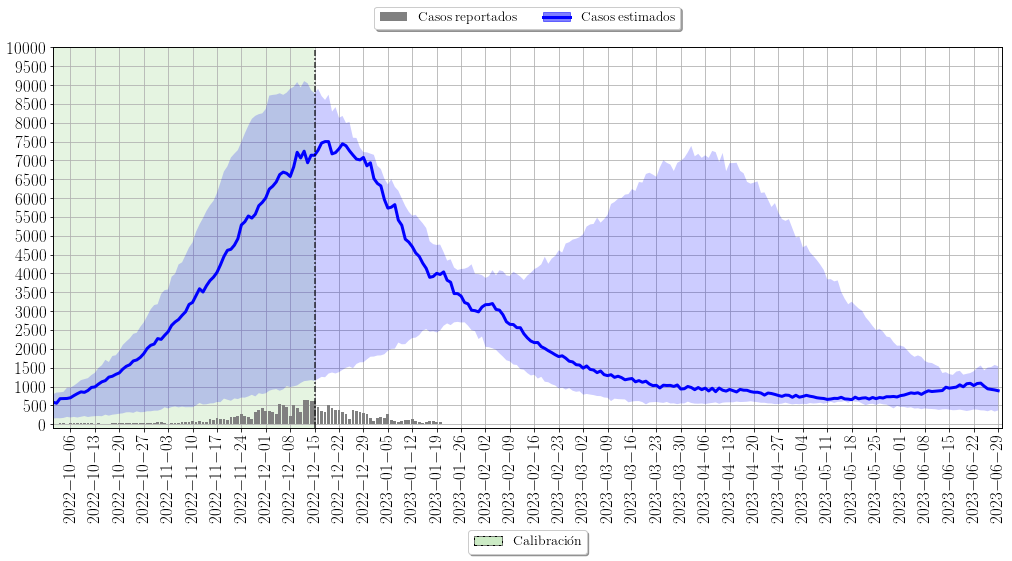

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(w=17, h=7)
P = []
legend_label = []

## Reported cases
p0 = ax.bar(df_cases.date, df_cases.cases, zorder = 3, color='grey')
P.append((p0))
legend_label.append('Casos reportados')

## Simulated cases
p1 = ax.plot(date_phosp_fit, phosp_fit_median,  alpha = 1, zorder = 2, color = colores[0], linewidth = 3)
ax.fill_between(date_phosp_fit, phosp_fit_low, phosp_fit_high, where=phosp_fit_high >= phosp_fit_low, facecolor=colores[0], zorder = 3, interpolate=True, alpha = 0.2)
p1_1 = ax.fill(pd.np.NaN, pd.np.NaN, color = colores[0], alpha=0.5)
P.append((p1[0], p1_1[0]))
legend_label.append('Casos estimados')

## Area de validación
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.axvline(x = fit_date, color = 'black', alpha = 0.6, linewidth = 2, linestyle =  (0, (3, 1, 1, 1)), zorder = 7)
#ax.axvline(x = df_cases['Date'].tolist()[-1], color = 'black', alpha = 0.6, linewidth = 2, linestyle = (0, (3, 1, 1, 1)), zorder = 7)

ax.fill_between(date_CF_fit, 0, 1, where = (date_CF_fit <= fit_date),
                 facecolor=plt.cm.Pastel1(2), alpha=0.5, transform=trans, zorder = 1)
# ax.fill_between(date_phosp_fit, 0, 1, where = (date_phosp_fit >= fit_date) & (date_phosp_fit <= df_cases['Date'].tolist()[-1]),
#                  facecolor=plt.cm.Pastel1(7), alpha=0.5, transform=trans, zorder = 1)

### Plot details
time_labels = pd.date_range(dt.datetime(2021,7,1), periods=120, freq='7d')
ax.set_xticks(time_labels)
plt.setp(ax.get_xticklabels(), rotation=90)

## Legend
ax.legend(P, legend_label, loc='upper center', bbox_to_anchor=(0.5, 1.125),
          fancybox=True, shadow=True, ncol=7, fontsize = 13.5)
ax2 = ax.twinx()
q1 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(2), ec='black')
q2 = ax2.bar([0], [0], ls=(0, (3, 1, 1, 1)), color=plt.cm.Pastel1(7), ec='black')
ax2.get_yaxis().set_visible(False)
ax2.legend([(q1[0]),], ['Calibración'], loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=7, fontsize = 14)

### Plot settings
ax.set_xlim(dt.datetime(2022,10,1),dt.datetime(2023,6,30))
ax.yaxis.set_ticks(pd.np.arange(0,11000,500))
ax.set_ylim(-100, 10000)
ax.grid()

### Guardar grafica
plt.savefig('figures/casos_omicron.png', bbox_inches='tight', pad_inches=0.03, dpi = 150)

In [ ]:
plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots()
fig1.set_size_inches(w=17, h=7)

df_data_cases = pd.read_csv('../COL_covid_death_data.csv')
date_cases = pd.to_datetime(df_data_cases['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
data_cases = df_data_cases['Cases'].to_numpy()
ax1.scatter(date_cases, data_cases, s=15, color ='black')

counter = 0
P = []
legend_label = []
if all_sub_scenarios == False:
    mask = df_fit['intervention_id'] == scenario

    phosp_fit_low = df_fit[mask]['Cs_low'].to_numpy()
    phosp_fit_high = df_fit[mask]['Cs_high'].to_numpy() 
    phosp_fit_median = df_fit[mask]['Cs_median'].to_numpy()

    date_phosp_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
    # ax1.plot(date_UCI_fit, phosp_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
    p2 = ax1.plot(date_phosp_fit, phosp_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 3)
    # ax1.plot(date_UCI_fit, phosp_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

    ax1.fill_between(date_phosp_fit, phosp_fit_low, phosp_fit, where=phosp_fit_high >= phosp_fit_low, facecolor=colores[counter], interpolate=True, alpha = 0.2)

    p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
    P.append((p2[0], p1[0]))
    legend_label.append(scenario)
    
else:
    counter_label
    for sce in scenarios:
        mask = df_fit['intervention_id'] == sce

        phosp_fit_low = df_fit[mask]['Cs_low'].to_numpy()
        phosp_fit_high = df_fit[mask]['Cs_high'].to_numpy() 
        phosp_fit_median = df_fit[mask]['Cs_median'].to_numpy()

        date_phosp_fit = pd.to_datetime(df_fit[mask]['Date'].to_numpy(), format='%Y-%m-%d', errors='coerce')
        # ax1.plot(date_UCI_fit, UCI_fit_high, alpha = 0.5, zorder = 1, color = 'gray', linewidth = 2)
        p2 = ax1.plot(date_phosp_fit, phosp_fit_median,  alpha = 1, zorder = 2, color = colores[counter], linewidth = 3)
        # ax1.plot(date_UCI_fit, UCI_fit_low, alpha = 0.5, zorder = 1, color = 'gray', linestyle = '--')

        ax1.fill_between(date_phosp_fit, phosp_fit_low, phosp_fit_high, where=phosp_fit_high >= phosp_fit_low, facecolor=colores[counter], interpolate=True, alpha = 0.2)

        p1 = ax1.fill(pd.np.NaN, pd.np.NaN, color = colores[counter], alpha=0.5)
        P.append((p2[0], p1[0]))
        if counter_label == 0:
            legend_label.append(dic_sce['mov_base'])
            counter_label += 1
        else:
            legend_label.append(dic_sce[sce[mo.span()[0]:]])
        counter += 1
                
### Plot details
time_labels = pd.date_range(dt.datetime(2020,1,3), periods=55, freq='15d')
ax1.set_xticks(time_labels)
plt.setp(ax1.get_xticklabels(), rotation=90)

ax1.set_xlim(dt.datetime(2020,3,1),dt.datetime(2022,3,1))
plt.grid()
ax1.legend(P, legend_label)

In [ ]:
fixed_columns = ['Fecha', 'Infecciones']
df_proj_infec = pd.DataFrame(columns = fixed_columns)

df_proj_infec['Fecha'] = date_days
df_proj_infec['Infecciones'] = cases.astype(int)

df_proj_infec.to_csv('summary_projections/'+scenario_family_label+'/infecciones_'+scenario+'.csv', index = False)